### **Paper title** : Predictive modeling of Children's health,Learning and Well-being in Bangladesh using Supervised Machine Learning Techniques

In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
categorical_2019 = pd.read_csv("/content/2019Cat.csv")
numerical_2019 = pd.read_csv("/content/2019Num.csv")

<ipython-input-2-8c1b82019c66>:1: DtypeWarning: Columns (27,102,103,370,393,394,395,396,397,398,399,400,401,407,457,529,532,549,594,600,601,602,604,605,606,608,609,610,611,612,613,614,615,616,617,640,652,653,654,655,660,714,726,729,731,761,765,766,767,768,769,771,772,857,864,865,866,867,880,886,887,888,889,890,891,892,900,902,904,927,956,971,981) have mixed types. Specify dtype option on import or set low_memory=False.
  categorical_2019 = pd.read_csv("/content/2019Cat.csv")


In [ ]:
mics6 = categorical_2019[['CAGE','area1','melevel','windex5','Religion1','HHSEX','ethnicity','HL4','WA2','ED1','underweight1','Stunned1',
             'Wasted1','Overweight1','TF1','HH7','ECEP1','MS1','FS1','OS1','IS1','SI2','Books1','Toys1','MM1','CPU1','Literacy_numeracy_score1','Physical_score1','Learning_score1','Social_emotional_score1']]

In [ ]:
mics6.shape

(11040, 30)

In [ ]:
mics6.head()

,CAGE,area1,melevel,windex5,Religion1,HHSEX,ethnicity,HL4,WA2,ED1,underweight1,Stunned1,Wasted1,Overweight1,TF1,HH7,ECEP1,MS1,FS1,OS1,IS1,SI2,Books1,Toys1,MM1,CPU1,Literacy_numeracy_score1,Physical_score1,Learning_score1,Social_emotional_score1
0,58.0,Rural,Higher secondary+,Richest,Islam,Male,Bengali,MALE,2.0,0.0,No,No,No,No,improved,Barishal,No,1,1,1,No,1.0,No,Yes,Yes,2,Yes,Yes,Yes,Yes
1,36.0,Rural,Primary,Fourth,Others,Male,Bengali,FEMALE,3.0,0.0,Yes,Yes,No,No,improved,Barishal,No,1,1,1,No,1.0,Yes,Yes,Yes,2,No,Yes,Yes,Yes
2,45.0,Rural,Higher secondary+,Richest,Islam,Male,Bengali,MALE,2.0,0.0,No,No,No,No,improved,Barishal,No,1,1,1,No,0.0,Yes,No,No,2,No,Yes,Yes,No
3,54.0,Rural,Higher secondary+,Richest,Islam,Male,Bengali,FEMALE,2.0,0.0,Yes,Yes,No,No,improved,Barishal,Yes,1,1,0,No,0.0,Yes,No,No,2,Yes,Yes,Yes,Yes
4,39.0,Rural,Secondary,Second,Islam,Female,Bengali,MALE,1.0,1.0,No,No,No,No,improved,Barishal,No,0,1,0,No,1.0,Yes,Yes,Yes,1,Yes,Yes,Yes,Yes


In [ ]:
# Converting child's age from month to year

def cage_years(cage):
    if cage<48:
        return 3
    elif 48<=cage<60:
        return 4

mics6['CAGE(in years)'] = mics6['CAGE'].apply(cage_years)
mics6 = mics6.drop('CAGE',axis=1)
mics6.head()

<ipython-input-6-a0f8647b8d09>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mics6['CAGE(in years)'] = mics6['CAGE'].apply(cage_years)


,area1,melevel,windex5,Religion1,HHSEX,ethnicity,HL4,WA2,ED1,underweight1,Stunned1,Wasted1,Overweight1,TF1,HH7,ECEP1,MS1,FS1,OS1,IS1,SI2,Books1,Toys1,MM1,CPU1,Literacy_numeracy_score1,Physical_score1,Learning_score1,Social_emotional_score1,CAGE(in years)
0,Rural,Higher secondary+,Richest,Islam,Male,Bengali,MALE,2.0,0.0,No,No,No,No,improved,Barishal,No,1,1,1,No,1.0,No,Yes,Yes,2,Yes,Yes,Yes,Yes,4.0
1,Rural,Primary,Fourth,Others,Male,Bengali,FEMALE,3.0,0.0,Yes,Yes,No,No,improved,Barishal,No,1,1,1,No,1.0,Yes,Yes,Yes,2,No,Yes,Yes,Yes,3.0
2,Rural,Higher secondary+,Richest,Islam,Male,Bengali,MALE,2.0,0.0,No,No,No,No,improved,Barishal,No,1,1,1,No,0.0,Yes,No,No,2,No,Yes,Yes,No,3.0
3,Rural,Higher secondary+,Richest,Islam,Male,Bengali,FEMALE,2.0,0.0,Yes,Yes,No,No,improved,Barishal,Yes,1,1,0,No,0.0,Yes,No,No,2,Yes,Yes,Yes,Yes,4.0
4,Rural,Secondary,Second,Islam,Female,Bengali,MALE,1.0,1.0,No,No,No,No,improved,Barishal,No,0,1,0,No,1.0,Yes,Yes,Yes,1,Yes,Yes,Yes,Yes,3.0


In [ ]:
mics6.isnull().sum()

,0
area1,0
melevel,1
windex5,1586
Religion1,677
HHSEX,677
ethnicity,0
HL4,0
WA2,813
ED1,1597
underweight1,1908


In [ ]:
# Dropping all the null values

print(f"Shape of dataset before removing null values {mics6.shape}")
mics6 = mics6.dropna()
print(f"Shape of dataset after removing null values {mics6.shape}")

Shape of dataset before removing null values (11040, 30)
Shape of dataset after removing null values (7718, 30)


**We will drop some of the features based on two criteria:**

1) On the basis of correlation among each independent variable.

2) By using Variance Inflation Factor (VIF)

In [ ]:
mics6['HL4'].value_counts()

,count
HL4,
MALE,3973
FEMALE,3745


In [ ]:
mics6['area1'].value_counts()

,count
area1,
Urban,6293
Rural,1425


In [ ]:
mics6_gender = mics6.copy()

In [ ]:
male = mics6_gender[mics6_gender['HL4']=='MALE']
female = mics6_gender[mics6_gender['HL4']=='FEMALE']

**Male**

In [ ]:
# Literacy numeracy

print(male['Literacy_numeracy_score1'].value_counts())

# Physical score
print(male['Physical_score1'].value_counts())

# Learning score
print(male['Learning_score1'].value_counts())


# Social emotional score
print(male['Social_emotional_score1'].value_counts())

Literacy_numeracy_score1
No     2887
Yes    1086
Name: count, dtype: int64
Physical_score1
Yes    3922
No       51
Name: count, dtype: int64
Learning_score1
Yes    3572
No      401
Name: count, dtype: int64
Social_emotional_score1
Yes    2740
No     1233
Name: count, dtype: int64


In [ ]:
# Literacy numeracy

print(female['Literacy_numeracy_score1'].value_counts())

# Physical score
print(female['Physical_score1'].value_counts())

# Learning score
print(female['Learning_score1'].value_counts())


# Social emotional score
print(female['Social_emotional_score1'].value_counts())

Literacy_numeracy_score1
No     2621
Yes    1124
Name: count, dtype: int64
Physical_score1
Yes    3696
No       49
Name: count, dtype: int64
Learning_score1
Yes    3419
No      326
Name: count, dtype: int64
Social_emotional_score1
Yes    2850
No      895
Name: count, dtype: int64


In [ ]:
mics_encoded = mics6.copy()

# Label encoding the categorical features

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
mics_encoded['area1'] = le.fit_transform(mics_encoded['area1'])
mics_encoded['melevel'] = le.fit_transform(mics_encoded['melevel'])
mics_encoded['windex5'] = le.fit_transform(mics_encoded['windex5'])
mics_encoded['Religion1'] = le.fit_transform(mics_encoded['Religion1'])
mics_encoded['HHSEX'] = le.fit_transform(mics_encoded['HHSEX'])
mics_encoded['ethnicity'] = le.fit_transform(mics_encoded['ethnicity'])
mics_encoded['HL4'] = le.fit_transform(mics_encoded['HL4'])
mics_encoded['underweight1'] = le.fit_transform(mics_encoded['underweight1'])
mics_encoded['Stunned1'] = le.fit_transform(mics_encoded['Stunned1'])
mics_encoded['Wasted1'] = le.fit_transform(mics_encoded['Wasted1'])
mics_encoded['Overweight1'] = le.fit_transform(mics_encoded['Overweight1'])
mics_encoded['TF1'] = le.fit_transform(mics_encoded['TF1'])
mics_encoded['ECEP1'] = le.fit_transform(mics_encoded['ECEP1'])
mics_encoded['IS1'] = le.fit_transform(mics_encoded['IS1'])
mics_encoded['Books1'] = le.fit_transform(mics_encoded['Books1'])
mics_encoded['Toys1'] = le.fit_transform(mics_encoded['Toys1'])
mics_encoded['MM1'] = le.fit_transform(mics_encoded['MM1'])
mics_encoded['HH7'] = le.fit_transform(mics_encoded['HH7'])
mics_encoded['Literacy_numeracy_score1'] = le.fit_transform(mics_encoded['Literacy_numeracy_score1'])
mics_encoded['Physical_score1'] = le.fit_transform(mics_encoded['Physical_score1'])
mics_encoded['Learning_score1'] = le.fit_transform(mics_encoded['Learning_score1'])
mics_encoded['Social_emotional_score1'] = le.fit_transform(mics_encoded['Social_emotional_score1'])

In [ ]:
mics_encoded.head()

,area1,melevel,windex5,Religion1,HHSEX,ethnicity,HL4,WA2,ED1,underweight1,Stunned1,Wasted1,Overweight1,TF1,HH7,ECEP1,MS1,FS1,OS1,IS1,SI2,Books1,Toys1,MM1,CPU1,Literacy_numeracy_score1,Physical_score1,Learning_score1,Social_emotional_score1,CAGE(in years)
0,0,0,3,0,1,0,1,2.0,0.0,0,0,0,0,0,0,0,1,1,1,0,1.0,0,1,1,2,1,1,1,1,4.0
1,0,2,0,1,1,0,0,3.0,0.0,1,1,0,0,0,0,0,1,1,1,0,1.0,1,1,1,2,0,1,1,1,3.0
2,0,0,3,0,1,0,1,2.0,0.0,0,0,0,0,0,0,0,1,1,1,0,0.0,1,0,0,2,0,1,1,0,3.0
3,0,0,3,0,1,0,0,2.0,0.0,1,1,0,0,0,0,1,1,1,0,0,0.0,1,0,0,2,1,1,1,1,4.0
4,0,3,4,0,0,0,1,1.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1.0,1,1,1,1,1,1,1,1,3.0


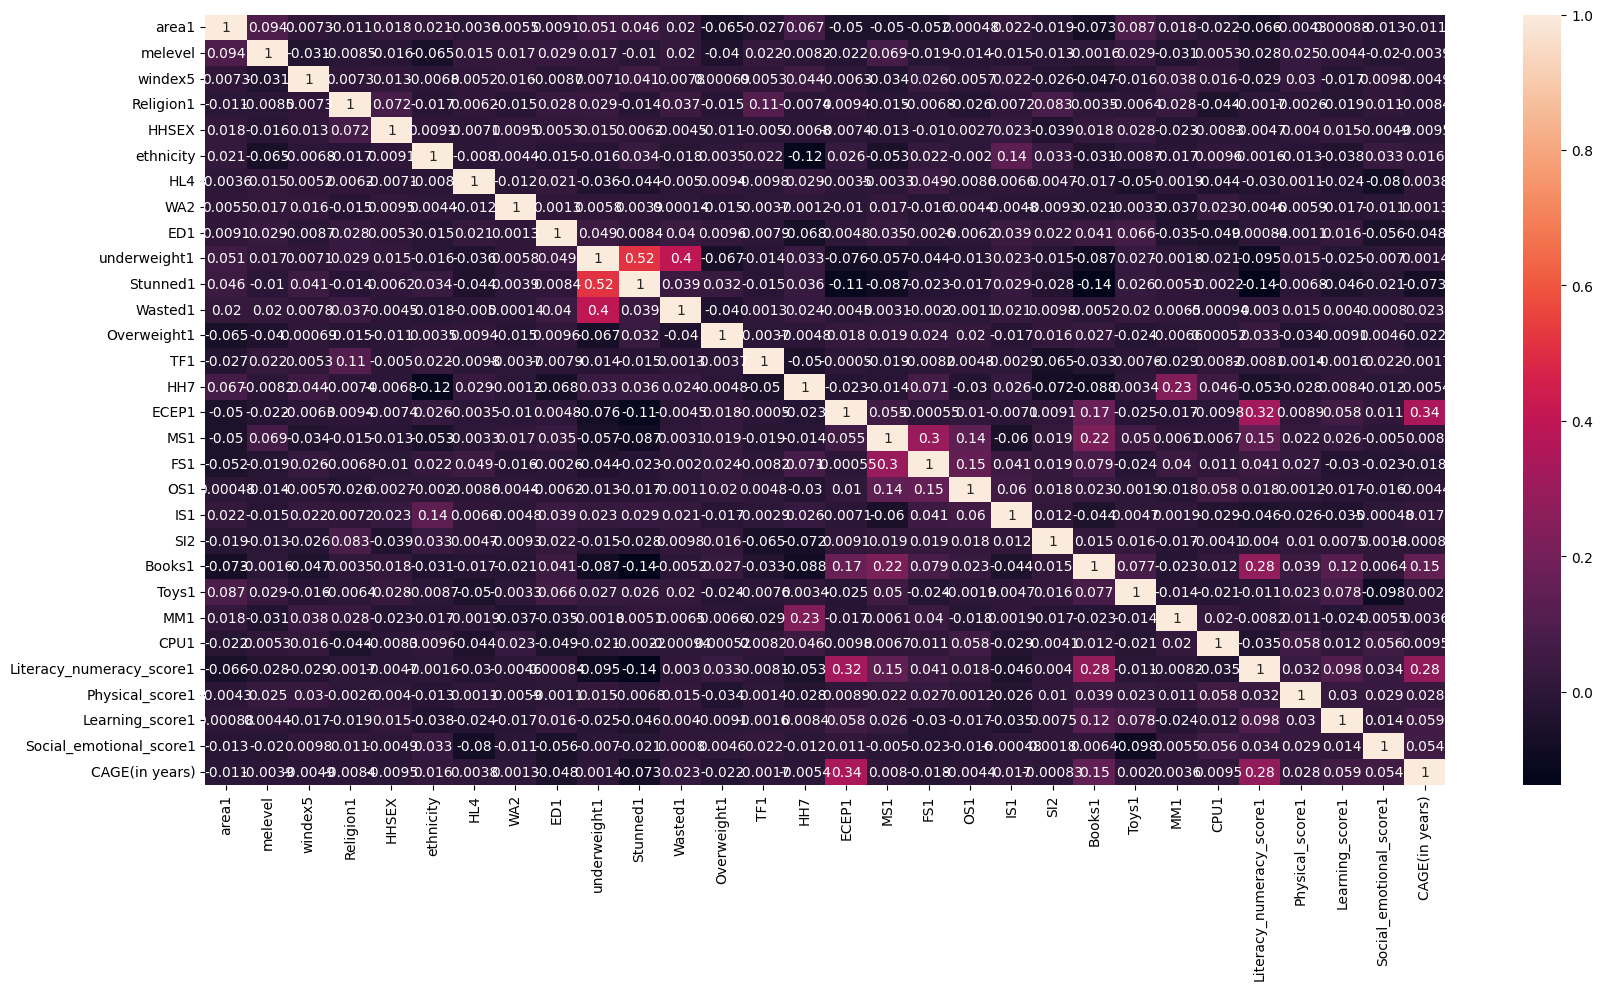

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(mics_encoded.corr(),annot=True)
plt.show()

In [ ]:
# Calculating VIF

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['feature'] = dataset.columns
    vif['VIF_values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [ ]:
features = mics_encoded.drop(['Literacy_numeracy_score1', 'Social_emotional_score1', 'Physical_score1', 'Learning_score1'],axis=1)
calculate_vif(features)

,feature,VIF_values
0,area1,5.508885
1,melevel,4.794996
2,windex5,3.113494
3,Religion1,1.204725
4,HHSEX,6.599364
5,ethnicity,1.076806
6,HL4,2.060108
7,WA2,9.572183
8,ED1,1.424304
9,underweight1,2.285315


**So it is clearly seen that CPU1 and CAGE(in years) has a very high VIF values. So we are going to drop one of these. Which one should be dropped? For this, we are going to see which variable is more correlated to dependent variable(s). The one with low correlation value is going to be dropped!**

In [ ]:
mics_encoded.corr()

,area1,melevel,windex5,Religion1,HHSEX,ethnicity,HL4,WA2,ED1,underweight1,Stunned1,Wasted1,Overweight1,TF1,HH7,ECEP1,MS1,FS1,OS1,IS1,SI2,Books1,Toys1,MM1,CPU1,Literacy_numeracy_score1,Physical_score1,Learning_score1,Social_emotional_score1,CAGE(in years)
area1,1.000000,0.094371,0.007303,-0.010957,0.017609,0.020530,-0.003643,0.005457,0.009092,0.050801,0.046402,0.019609,-0.065122,-0.026909,0.067299,-0.049656,-0.050056,-0.051513,0.000482,0.021742,-0.018524,-0.073312,0.086919,0.018211,-0.021661,-0.065716,-0.004321,0.000882,-0.013376,-0.010827
melevel,0.094371,1.000000,-0.030653,-0.008511,-0.015920,-0.064920,0.014638,0.016825,0.029476,0.017453,-0.010348,0.020378,-0.040315,0.022488,-0.008220,-0.021736,0.068889,-0.019422,-0.014477,-0.015400,-0.012692,-0.001567,0.029024,-0.031447,0.005320,-0.027872,0.024570,0.004441,-0.020457,-0.003927
windex5,0.007303,-0.030653,1.000000,0.007336,0.012983,-0.006772,0.005173,0.015539,-0.008668,0.007111,0.041304,0.007757,0.000695,0.005331,0.044081,-0.006334,-0.033611,0.025521,-0.005687,0.021726,-0.025678,-0.046968,-0.015654,0.038055,0.015816,-0.029436,0.030199,-0.017437,0.009769,-0.004903
Religion1,-0.010957,-0.008511,0.007336,1.000000,0.072072,-0.016826,0.006160,-0.015266,0.028292,0.028823,-0.013759,0.037133,-0.015263,0.108885,-0.007403,0.009371,-0.015403,-0.006784,-0.026158,0.007224,0.082709,0.003538,-0.006405,0.028395,-0.044379,-0.001739,-0.002580,-0.018632,0.011179,-0.008354
HHSEX,0.017609,-0.015920,0.012983,0.072072,1.000000,0.009052,-0.007073,0.009452,0.005300,0.015129,0.006165,-0.004526,-0.010604,-0.004973,-0.006790,-0.007361,-0.013008,-0.010427,0.002667,0.022930,-0.039112,0.017657,0.028206,-0.023106,-0.008252,-0.004731,0.004013,0.014647,-0.004941,-0.009543
ethnicity,0.020530,-0.064920,-0.006772,-0.016826,0.009052,1.000000,-0.007981,0.004382,-0.014940,-0.016303,0.034321,-0.018024,0.003467,0.021821,-0.122419,0.026304,-0.053065,0.021816,-0.001981,0.137352,0.032683,-0.031040,-0.008733,-0.017112,0.009575,-0.001591,-0.013472,-0.037680,0.033155,0.016250
HL4,-0.003643,0.014638,0.005173,0.006160,-0.007073,-0.007981,1.000000,-0.012266,0.021469,-0.036172,-0.043895,-0.004992,0.009421,-0.009795,0.029119,-0.003451,-0.003276,0.049379,-0.008586,0.006565,0.004688,-0.016850,-0.050105,-0.001948,-0.043701,-0.029617,0.001094,-0.023752,-0.079808,0.003815
WA2,0.005457,0.016825,0.015539,-0.015266,0.009452,0.004382,-0.012266,1.000000,0.001286,0.005781,0.003912,0.000141,-0.014976,-0.003687,-0.001165,-0.010354,0.016910,-0.015807,0.004391,-0.004849,-0.009316,-0.020515,-0.003323,-0.037049,0.023236,-0.004573,-0.005944,-0.017155,-0.010956,0.001333
ED1,0.009092,0.029476,-0.008668,0.028292,0.005300,-0.014940,0.021469,0.001286,1.000000,0.049224,0.008392,0.039908,0.009562,-0.007943,-0.068301,0.004783,0.034893,-0.002611,-0.006178,0.038658,0.021552,0.041488,0.065872,-0.034944,-0.048829,0.000841,-0.001059,0.016489,-0.055679,-0.048426
underweight1,0.050801,0.017453,0.007111,0.028823,0.015129,-0.016303,-0.036172,0.005781,0.049224,1.000000,0.515778,0.396467,-0.067077,-0.014256,0.033262,-0.076468,-0.057389,-0.043826,-0.012830,0.022525,-0.015016,-0.086748,0.026644,-0.001794,-0.020907,-0.094921,0.015259,-0.024758,-0.006972,0.001413


So we have found that CPU1 is less correlated to dependent variable(s) and that's why we are going to drop CPU1 and also since WA2 has VIF>9 so we will also drop it.

In [ ]:
mics_encoded_revised = mics_encoded.drop(['CPU1','WA2','FS1','MS1','OS1','SI2','ED1'],axis=1)

In [ ]:
mics_encoded_revised.shape

(7718, 23)

In [ ]:
# Let's see the VIFs again!

features = mics_encoded_revised.drop(['Literacy_numeracy_score1', 'Social_emotional_score1', 'Physical_score1', 'Learning_score1'],axis=1)
calculate_vif(features)

,feature,VIF_values
0,area1,5.419318
1,melevel,4.618273
2,windex5,3.058325
3,Religion1,1.190272
4,HHSEX,6.336939
5,ethnicity,1.070650
6,HL4,2.043389
7,underweight1,2.276389
8,Stunned1,2.036171
9,Wasted1,1.379907


# Cross tabs

### Litercy-Numeracy

In [ ]:
pd.crosstab(mics_encoded['CAGE(in years)'],mics_encoded['Literacy_numeracy_score1'])

Literacy_numeracy_score1,0,1
CAGE(in years),,
3.0,3279,638
4.0,2229,1572


In [ ]:
pd.crosstab(mics6['area1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
area1,,
Rural,928,497
Urban,4580,1713


In [ ]:
pd.crosstab(mics6['windex5'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
windex5,,
Fourth,958,477
Middle,1015,440
Poorest,1571,365
Richest,701,544
Second,1263,384


In [ ]:
pd.crosstab(mics6['Religion1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
Religion1,,
Islam,4723,1898
Others,785,312


In [ ]:
pd.crosstab(mics6['HHSEX'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
HHSEX,,
Female,807,332
Male,4701,1878


In [ ]:
pd.crosstab(mics6['ethnicity'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
ethnicity,,
Bengali,5383,2161
Other,125,49


In [ ]:
pd.crosstab(mics6['HL4'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
HL4,,
FEMALE,2621,1124
MALE,2887,1086


In [ ]:
pd.crosstab(mics6['underweight1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
underweight1,,
No,4002,1806
Yes,1506,404


In [ ]:
pd.crosstab(mics6['Stunned1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
Stunned1,,
No,3733,1799
Yes,1775,411


In [ ]:
pd.crosstab(mics6['Wasted1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
Wasted1,,
No,4968,1989
Yes,540,221


In [ ]:
pd.crosstab(mics6['Overweight1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
Overweight1,,
No,5442,2164
Yes,66,46


In [ ]:
pd.crosstab(mics6['TF1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
TF1,,
improved,5326,2144
unimproved,182,66


In [ ]:
pd.crosstab(mics6['HH7'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
HH7,,
Barishal,463,225
Chattogram,1093,472
Dhaka,1058,479
Khulna,789,292
Mymenshing,328,143
Rajshahi,667,215
Rangpur,648,242
Sylhet,462,142


In [ ]:
pd.crosstab(mics6['ECEP1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
ECEP1,,
No,4898,1349
Yes,610,861


In [ ]:
pd.crosstab(mics6['IS1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
IS1,,
No,4947,2051
Yes,561,159


In [ ]:
pd.crosstab(mics6['Books1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
Books1,,
No,3126,566
Yes,2382,1644


In [ ]:
pd.crosstab(mics6['Toys1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
Toys1,,
No,942,398
Yes,4566,1812


In [ ]:
pd.crosstab(mics6['MM1'],mics6['Literacy_numeracy_score1'])

Literacy_numeracy_score1,No,Yes
MM1,,
No,2152,883
Yes,3356,1327


### Physical

In [ ]:
pd.crosstab(mics_encoded['CAGE(in years)'],mics_encoded['Physical_score1'])

Physical_score1,0,1
CAGE(in years),,
3.0,63,3854
4.0,37,3764


In [ ]:
pd.crosstab(mics6['area1'],mics6['Physical_score1'])

Physical_score1,No,Yes
area1,,
Rural,17,1408
Urban,83,6210


In [ ]:
pd.crosstab(mics6['melevel'],mics6['Physical_score1'])

Physical_score1,No,Yes
melevel,,
Higher secondary+,17,1036
Pre-primary or none,16,1010
Primary,32,1851
Secondary,35,3721


In [ ]:
pd.crosstab(mics6['windex5'],mics6['Physical_score1'])

Physical_score1,No,Yes
windex5,,
Fourth,24,1411
Middle,20,1435
Poorest,36,1900
Richest,6,1239
Second,14,1633


In [ ]:
pd.crosstab(mics6['Religion1'],mics6['Physical_score1'])

Physical_score1,No,Yes
Religion1,,
Islam,85,6536
Others,15,1082


In [ ]:
pd.crosstab(mics6['HHSEX'],mics6['Physical_score1'])

Physical_score1,No,Yes
HHSEX,,
Female,16,1123
Male,84,6495


In [ ]:
pd.crosstab(mics6['ethnicity'],mics6['Physical_score1'])

Physical_score1,No,Yes
ethnicity,,
Bengali,96,7448
Other,4,170


In [ ]:
pd.crosstab(mics6['HL4'],mics6['Physical_score1'])

Physical_score1,No,Yes
HL4,,
FEMALE,49,3696
MALE,51,3922


In [ ]:
pd.crosstab(mics6['underweight1'],mics6['Physical_score1'])

Physical_score1,No,Yes
underweight1,,
No,81,5727
Yes,19,1891


In [ ]:
pd.crosstab(mics6['Stunned1'],mics6['Physical_score1'])

Physical_score1,No,Yes
Stunned1,,
No,69,5463
Yes,31,2155


In [ ]:
pd.crosstab(mics6['Wasted1'],mics6['Physical_score1'])

Physical_score1,No,Yes
Wasted1,,
No,94,6863
Yes,6,755


In [ ]:
pd.crosstab(mics6['Overweight1'],mics6['Physical_score1'])

Physical_score1,No,Yes
Overweight1,,
No,95,7511
Yes,5,107


In [ ]:
pd.crosstab(mics6['TF1'],mics6['Physical_score1'])

Physical_score1,No,Yes
TF1,,
improved,97,7373
unimproved,3,245


In [ ]:
pd.crosstab(mics6['HH7'],mics6['Physical_score1'])

Physical_score1,No,Yes
HH7,,
Barishal,3,685
Chattogram,19,1546
Dhaka,16,1521
Khulna,7,1074
Mymenshing,17,454
Rajshahi,11,871
Rangpur,24,866
Sylhet,3,601


In [ ]:
pd.crosstab(mics6['ECEP1'],mics6['Physical_score1'])

Physical_score1,No,Yes
ECEP1,,
No,84,6163
Yes,16,1455


In [ ]:
pd.crosstab(mics6['IS1'],mics6['Physical_score1'])

Physical_score1,No,Yes
IS1,,
No,84,6914
Yes,16,704


In [ ]:
pd.crosstab(mics6['Books1'],mics6['Physical_score1'])

Physical_score1,No,Yes
Books1,,
No,65,3627
Yes,35,3991


In [ ]:
pd.crosstab(mics6['Toys1'],mics6['Physical_score1'])

Physical_score1,No,Yes
Toys1,,
No,25,1315
Yes,75,6303


In [ ]:
pd.crosstab(mics6['MM1'],mics6['Physical_score1'])

Physical_score1,No,Yes
MM1,,
No,44,2991
Yes,56,4627


### Learning

In [ ]:
pd.crosstab(mics_encoded['CAGE(in years)'],mics_encoded['Learning_score1'])

Learning_score1,0,1
CAGE(in years),,
3.0,436,3481
4.0,291,3510


In [ ]:
pd.crosstab(mics6['area1'],mics6['Learning_score1'])

Learning_score1,No,Yes
area1,,
Rural,135,1290
Urban,592,5701


In [ ]:
pd.crosstab(mics6['windex5'],mics6['Learning_score1'])

Learning_score1,No,Yes
windex5,,
Fourth,114,1321
Middle,130,1325
Poorest,222,1714
Richest,89,1156
Second,172,1475


In [ ]:
pd.crosstab(mics6['Religion1'],mics6['Learning_score1'])

Learning_score1,No,Yes
Religion1,,
Islam,609,6012
Others,118,979


In [ ]:
pd.crosstab(mics6['HHSEX'],mics6['Learning_score1'])

Learning_score1,No,Yes
HHSEX,,
Female,119,1020
Male,608,5971


In [ ]:
pd.crosstab(mics6['ethnicity'],mics6['Learning_score1'])

Learning_score1,No,Yes
ethnicity,,
Bengali,698,6846
Other,29,145


In [ ]:
pd.crosstab(mics6['HL4'],mics6['Learning_score1'])

Learning_score1,No,Yes
HL4,,
FEMALE,326,3419
MALE,401,3572


In [ ]:
pd.crosstab(mics6['underweight1'],mics6['Learning_score1'])

Learning_score1,No,Yes
underweight1,,
No,523,5285
Yes,204,1706


In [ ]:
pd.crosstab(mics6['Stunned1'],mics6['Learning_score1'])

Learning_score1,No,Yes
Stunned1,,
No,474,5058
Yes,253,1933


In [ ]:
pd.crosstab(mics6['Wasted1'],mics6['Learning_score1'])

Learning_score1,No,Yes
Wasted1,,
No,658,6299
Yes,69,692


In [ ]:
pd.crosstab(mics6['Wasted1'],mics6['Learning_score1'])

Learning_score1,No,Yes
Wasted1,,
No,658,6299
Yes,69,692


In [ ]:
pd.crosstab(mics6['Overweight1'],mics6['Learning_score1'])

Learning_score1,No,Yes
Overweight1,,
No,714,6892
Yes,13,99


In [ ]:
pd.crosstab(mics6['TF1'],mics6['Learning_score1'])

Learning_score1,No,Yes
TF1,,
improved,703,6767
unimproved,24,224


In [ ]:
pd.crosstab(mics6['HH7'],mics6['Learning_score1'])

Learning_score1,No,Yes
HH7,,
Barishal,73,615
Chattogram,180,1385
Dhaka,124,1413
Khulna,82,999
Mymenshing,52,419
Rajshahi,65,817
Rangpur,68,822
Sylhet,83,521


In [ ]:
pd.crosstab(mics6['ECEP1'],mics6['Learning_score1'])

Learning_score1,No,Yes
ECEP1,,
No,640,5607
Yes,87,1384


In [ ]:
pd.crosstab(mics6['IS1'],mics6['Learning_score1'])

Learning_score1,No,Yes
IS1,,
No,636,6362
Yes,91,629


In [ ]:
pd.crosstab(mics6['Books1'],mics6['Learning_score1'])

Learning_score1,No,Yes
Books1,,
No,479,3213
Yes,248,3778


In [ ]:
pd.crosstab(mics6['Toys1'],mics6['Learning_score1'])

Learning_score1,No,Yes
Toys1,,
No,193,1147
Yes,534,5844


In [ ]:
pd.crosstab(mics6['MM1'],mics6['Learning_score1'])

Learning_score1,No,Yes
MM1,,
No,260,2775
Yes,467,4216


### Social-Emotional

In [ ]:
pd.crosstab(mics_encoded['CAGE(in years)'],mics_encoded['Social_emotional_score1'])

Social_emotional_score1,0,1
CAGE(in years),,
3.0,1173,2744
4.0,955,2846


In [ ]:
pd.crosstab(mics6['area1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
area1,,
Rural,375,1050
Urban,1753,4540


In [ ]:
pd.crosstab(mics6['melevel'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
melevel,,
Higher secondary+,258,795
Pre-primary or none,284,742
Primary,538,1345
Secondary,1048,2708


In [ ]:
pd.crosstab(mics6['windex5'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
windex5,,
Fourth,414,1021
Middle,400,1055
Poorest,553,1383
Richest,282,963
Second,479,1168


In [ ]:
pd.crosstab(mics6['Religion1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
Religion1,,
Islam,1839,4782
Others,289,808


In [ ]:
pd.crosstab(mics6['HHSEX'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
HHSEX,,
Female,308,831
Male,1820,4759


In [ ]:
pd.crosstab(mics6['ethnicity'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
ethnicity,,
Bengali,2097,5447
Other,31,143


In [ ]:
pd.crosstab(mics6['HL4'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
HL4,,
FEMALE,895,2850
MALE,1233,2740


In [ ]:
pd.crosstab(mics6['underweight1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
underweight1,,
No,1591,4217
Yes,537,1373


In [ ]:
pd.crosstab(mics6['Stunned1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
Stunned1,,
No,1493,4039
Yes,635,1551


In [ ]:
pd.crosstab(mics6['Wasted1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
Wasted1,,
No,1919,5038
Yes,209,552


In [ ]:
pd.crosstab(mics6['Overweight1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
Overweight1,,
No,2099,5507
Yes,29,83


In [ ]:
pd.crosstab(mics6['TF1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
TF1,,
improved,2073,5397
unimproved,55,193


In [ ]:
pd.crosstab(mics6['HH7'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
HH7,,
Barishal,239,449
Chattogram,413,1152
Dhaka,265,1272
Khulna,391,690
Mymenshing,174,297
Rajshahi,265,617
Rangpur,169,721
Sylhet,212,392


In [ ]:
pd.crosstab(mics6['ECEP1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
ECEP1,,
No,1737,4510
Yes,391,1080


In [ ]:
pd.crosstab(mics6['IS1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
IS1,,
No,1929,5069
Yes,199,521


In [ ]:
pd.crosstab(mics6['Books1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
Books1,,
No,1029,2663
Yes,1099,2927


In [ ]:
pd.crosstab(mics6['Toys1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
Toys1,,
No,242,1098
Yes,1886,4492


In [ ]:
pd.crosstab(mics6['MM1'],mics6['Social_emotional_score1'])

Social_emotional_score1,No,Yes
MM1,,
No,846,2189
Yes,1282,3401


In [ ]:
mics_final = mics_encoded_revised.copy()

In [ ]:
mics_final['Literacy_numeracy_score1'].value_counts()


# Literacy Numeracy percentage - 28.63%

,count
Literacy_numeracy_score1,
0,5508
1,2210


In [ ]:
mics_final['Physical_score1'].value_counts()

# Physical score percentage - 98.70%

,count
Physical_score1,
1,7618
0,100


In [ ]:
mics_final['Learning_score1'].value_counts()

# Learning score percentage - 90.6%

,count
Learning_score1,
1,6991
0,727


In [ ]:
mics_final['Social_emotional_score1'].value_counts()

# Social emotional score percentage - 72.43%

,count
Social_emotional_score1,
1,5590
0,2128


# Modeling

## Literacy-Numeracy

In [ ]:
lit_num = mics_final.drop(['Physical_score1','Learning_score1','Social_emotional_score1'],axis=1)

In [ ]:
x = lit_num.drop('Literacy_numeracy_score1',axis=1)
y = lit_num['Literacy_numeracy_score1']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**We are using SMOTE here.SMOTE (Synthetic Minority Over-sampling Technique) is a method used in machine learning to address class imbalance in datasets. It works by generating synthetic examples for the minority class, effectively increasing its representation. SMOTE does this by selecting random points from the minority class and creating new, synthetic samples along the line segments joining these points and their nearest neighbors. This approach helps to create a more balanced dataset, which can improve the performance of classifiers by preventing them from being biased towards the majority class. SMOTE is particularly useful in situations where the number of instances in the minority class is too small to train an effective model.**

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Cross-validation scores: [0.68906883 0.70607287 0.70283401 0.71093117 0.67098865]
Mean cross-validation accuracy: 0.6959791074744585
Training accuracy: 0.7311305474570781
Testing accuracy: 0.6930051813471503
Training Confusion Matrix:
 [[3254 1150]
 [ 510 1260]]
Testing Confusion Matrix:
 [[791 313]
 [161 279]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.80      4404
           1       0.52      0.71      0.60      1770

    accuracy                           0.73      6174
   macro avg       0.69      0.73      0.70      6174
weighted avg       0.77      0.73      0.74      6174

Testing Classification Report:
               precision    recall 

<ipython-input-34-6c0afd67c809>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


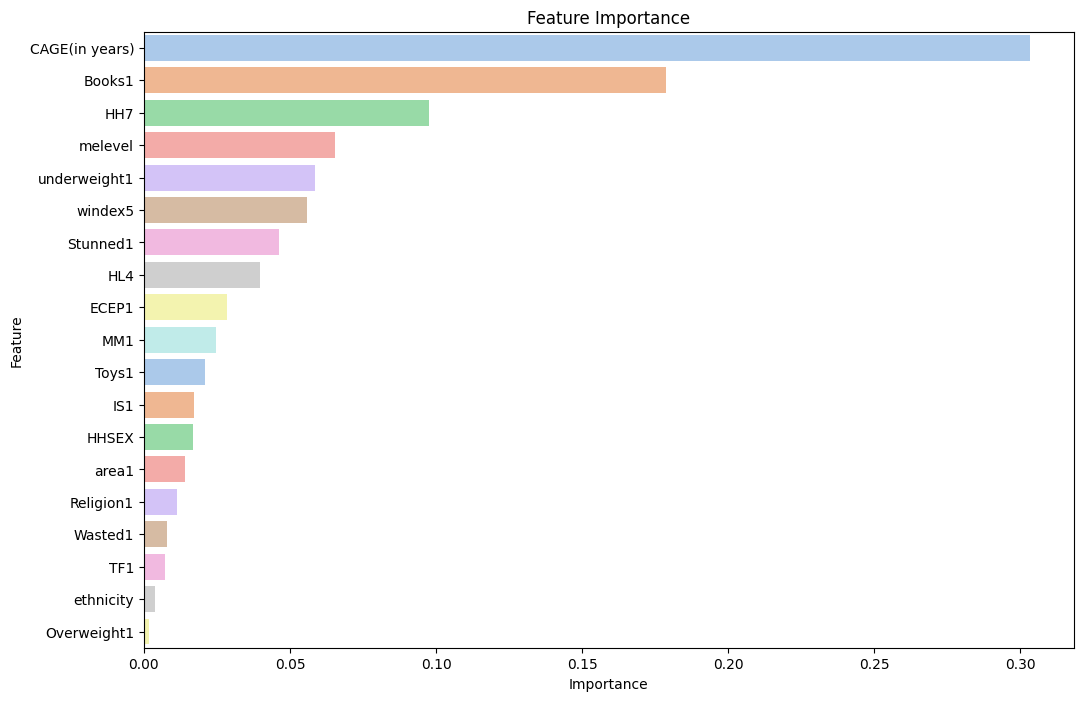

In [ ]:
# CART

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline



pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

try:
    feature_importances = best_estimator.named_steps['classifier'].feature_importances_
    features = x_train.columns
    importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
    importance_df = importance_df.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
except AttributeError:
    print("Feature importances are not available for this model.")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 333, in fit
    self._final_estimator.fit(Xt, yt, **last_step_params["fit"])
  File "/usr/local/li

Best parameters found:  {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Cross-validation scores: [0.72064777 0.71740891 0.73441296 0.72631579 0.72852512]
Mean cross-validation accuracy: 0.7254621093314261
Training accuracy: 0.7644962747003563
Testing accuracy: 0.7312176165803109
Training Confusion Matrix:
 [[3416  988]
 [ 466 1304]]
Testing Confusion Matrix:
 [[838 266]
 [149 291]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82      4404
           1       0.57      0.74      0.64      1770

    accuracy                           0.76      6174
   macro avg       0.72      0.76      0.73      6174
weighted avg       0.79      0.76      0.77      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80   

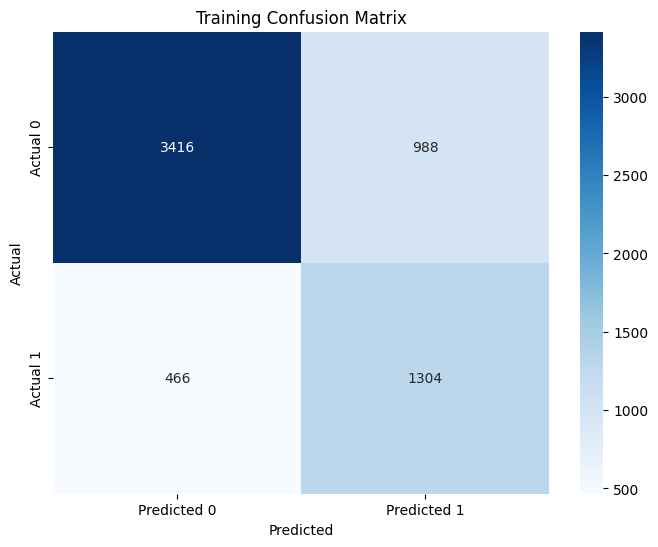

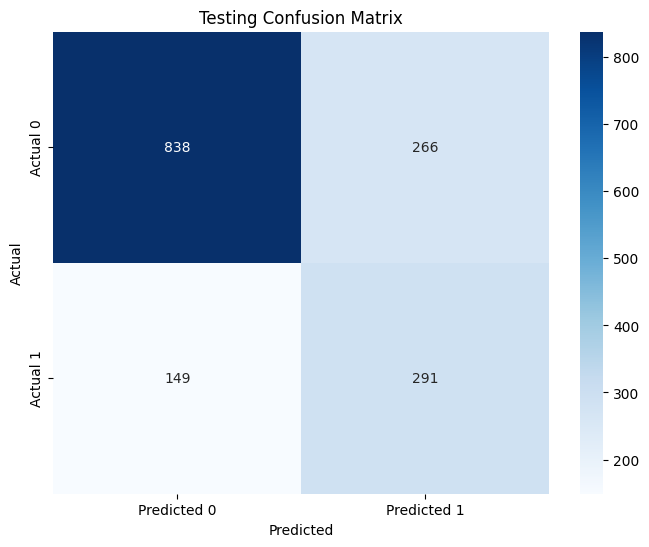

<ipython-input-35-4d1b98444e15>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


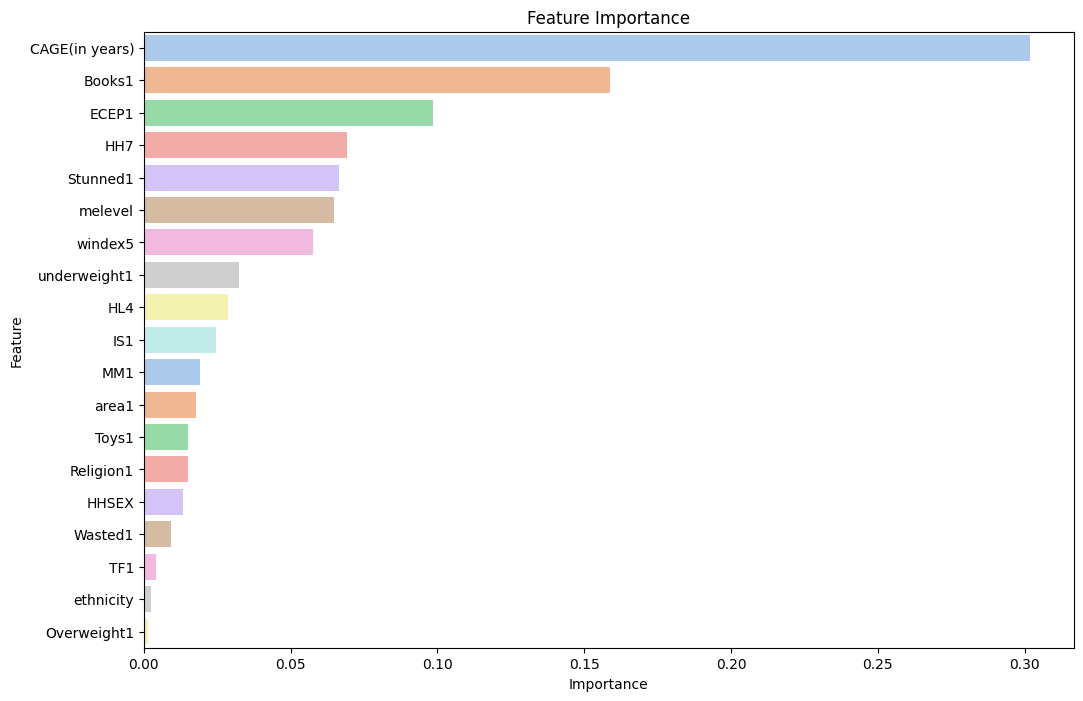

In [ ]:
# Random Forest

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score


pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)


train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:18:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 9, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:18:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:18:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:18:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:18:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:18:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores: [0.72712551 0.71740891 0.73198381 0.71659919 0.73257699]
Mean cross-validation accuracy: 0.7251388788640345


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:18:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training accuracy: 0.7662779397473275
Testing accuracy: 0.727979274611399
Training Confusion Matrix:
 [[3416  988]
 [ 455 1315]]
Testing Confusion Matrix:
 [[838 266]
 [154 286]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      4404
           1       0.57      0.74      0.65      1770

    accuracy                           0.77      6174
   macro avg       0.73      0.76      0.74      6174
weighted avg       0.79      0.77      0.77      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1104
           1       0.52      0.65      0.58       440

    accuracy                           0.73      1544
   macro avg       0.68      0.70      0.69      1544
weighted avg       0.75      0.73      0.74      1544

Training Cohen's Kappa: 0.47575385360621425
Testing Cohen's Kappa: 0.37997185167054215
Training ROC-AU

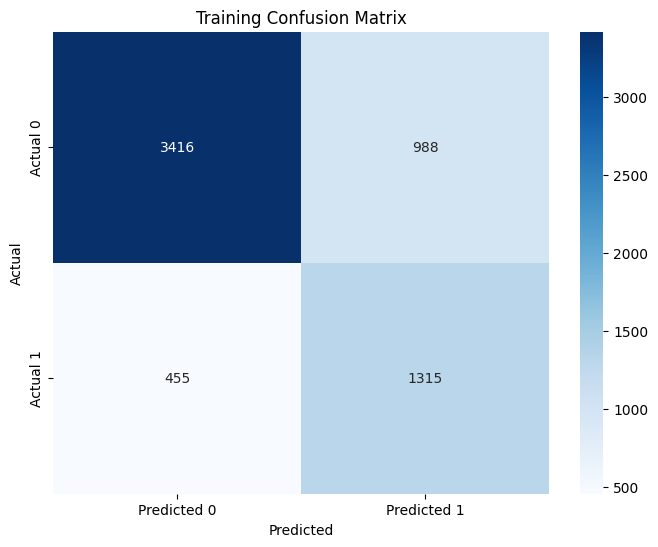

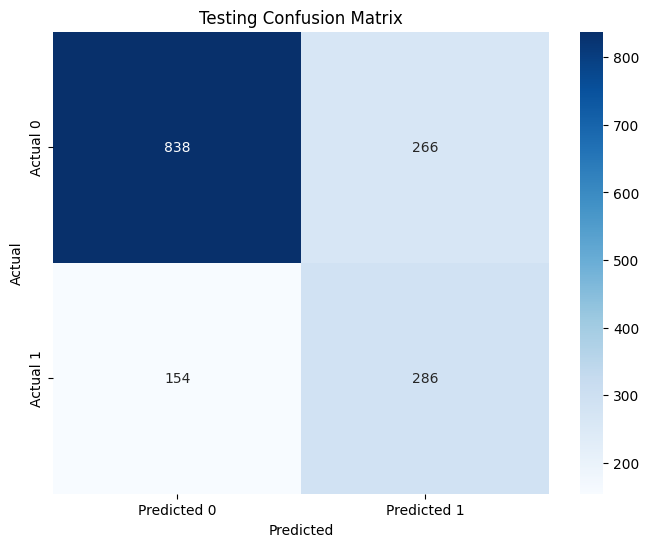

<ipython-input-36-ae39623eac42>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


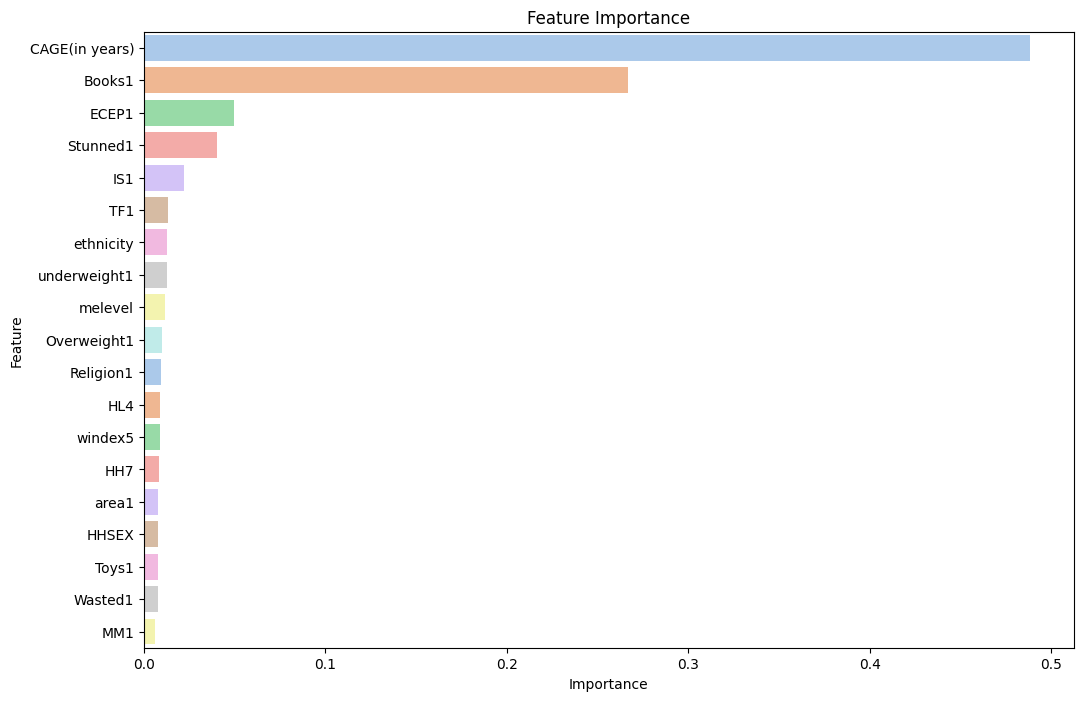

In [ ]:
# XGBoost

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score


pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 6, 9],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)


train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Best parameters found:  {'classifier__C': 0.01, 'classifier__l1_ratio': 0, 'classifier__penalty': 'l1'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Cross-validation scores: [0.69554656 0.70283401 0.72226721 0.70850202 0.6904376 ]
Mean cross-validation accuracy: 0.7039174797734893
Training accuracy: 0.7076449627470036
Testing accuracy: 0.7227979274611399
Training Confusion Matrix:
 [[3161 1243]
 [ 562 1208]]
Testing Confusion Matrix:
 [[809 295]
 [133 307]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Training Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78      4404
           1       0.49      0.68      0.57      1770

    accuracy                           0.71      6174
   macro avg       0.67      0.70      0.68      6174
weighted avg       0.75      0.71      0.72      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79      1104
           1       0.51      0.70      0.59       440

    accuracy                           0.72      1544
   macro avg       0.68      0.72      0.69      1544
weighted avg       0.76      0.72      0.73      1544

Training Cohen's Kappa: 0.3589435612716446
Testing Cohen's Kappa: 0.387601381907685
Training ROC-AUC Score: 0.7632595816848576
Testing ROC-AUC Score: 0.7711853590250329


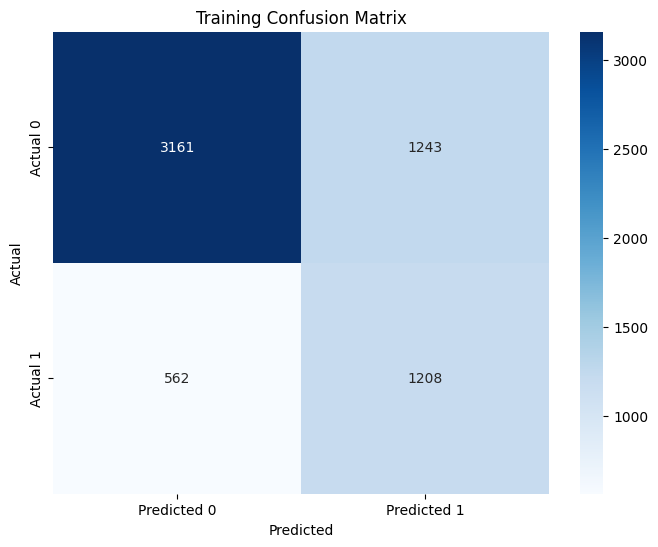

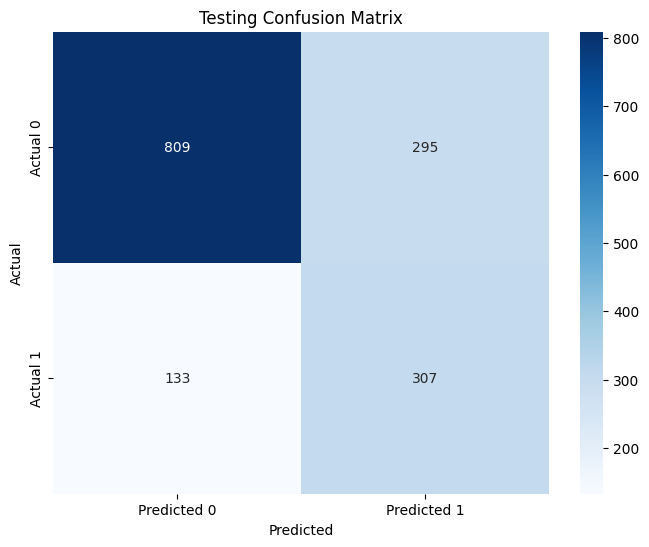

<ipython-input-37-0e6e23353c3a>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


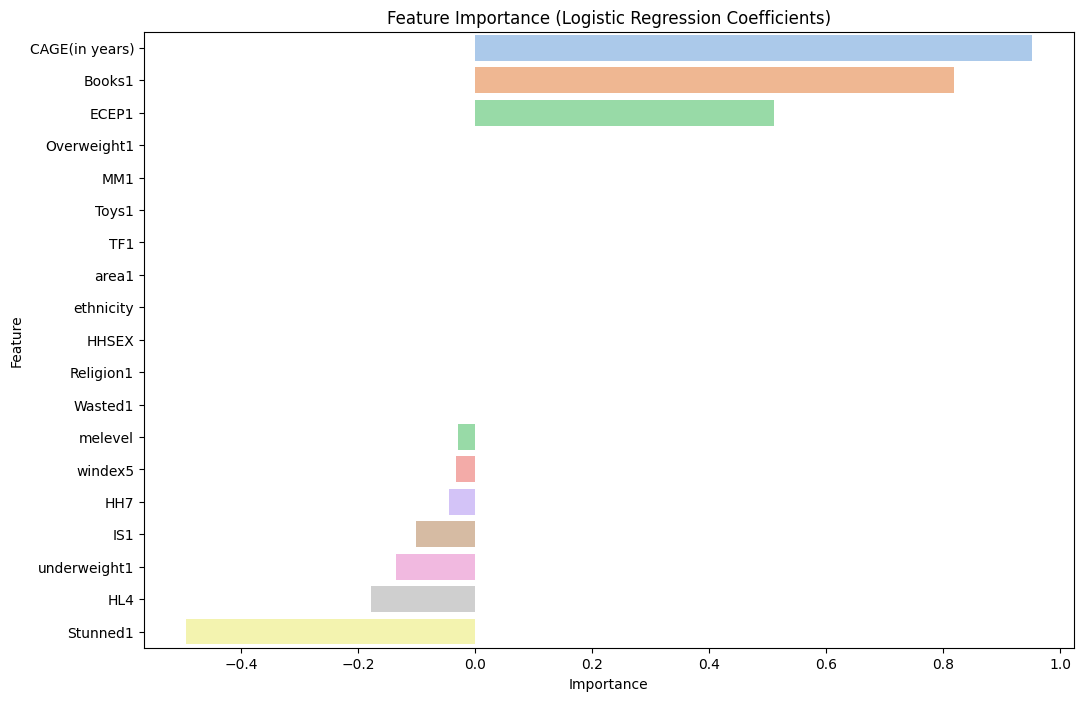

In [ ]:
# Logistic Regression

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd


pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='saga', random_state=42, max_iter=5000))
])

param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].coef_[0]
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Training accuracy: 0.7177565849227975
Testing accuracy: 0.6949481865284974
Training Confusion Matrix:
 [[3077 1327]
 [1159 3245]]
Testing Confusion Matrix:
 [[771 333]
 [138 302]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      4404
           1       0.71      0.74      0.72      4404

    accuracy                           0.72      8808
   macro avg       0.72      0.72      0.72      8808
weighted avg       0.72      0.72      0.72      8808

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77      1104
           1       0.48      0.69      0.56       440

    accuracy                           0.69      1544
   macro avg       0.66      0.69      0.66      1544
weighted avg       0.74      0.69      0.71      1544

Training Cohen's Kappa: 0.43551316984559496
Testing Cohen's Kappa: 0.33948773841961843
Training ROC-A

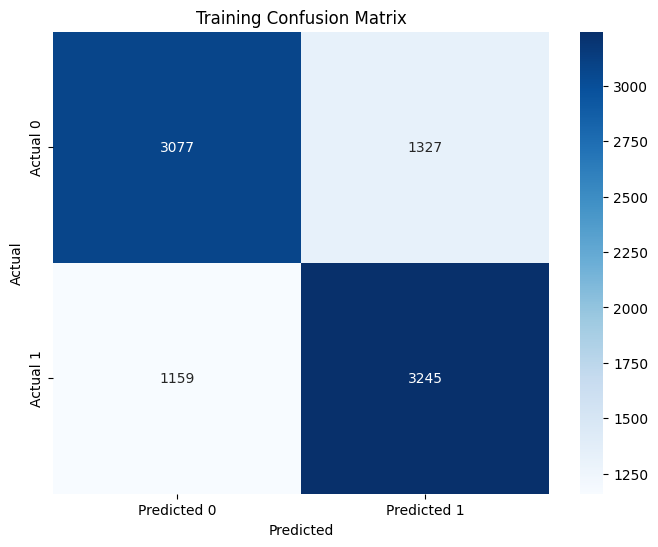

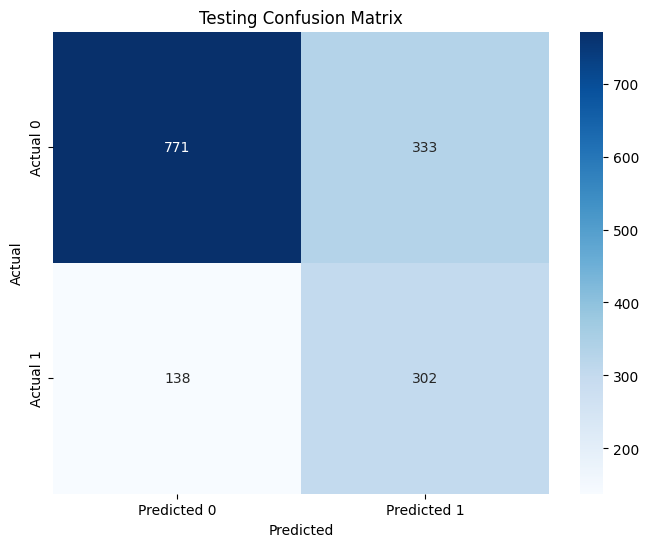

<ipython-input-38-f93ac0921f24>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


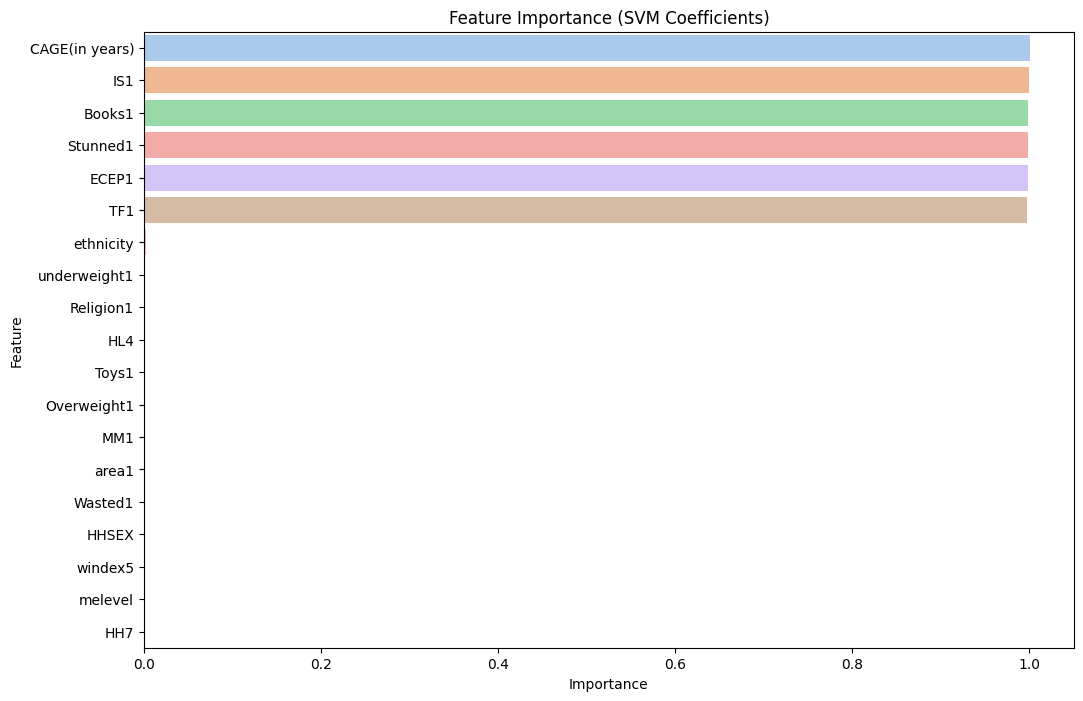

In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

svm = SVC(probability=True, kernel='linear')

svm.fit(x_train_resampled, y_train_resampled)

y_train_pred = svm.predict(x_train_resampled)
y_test_pred = svm.predict(x_test)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train_resampled, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train_resampled, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train_resampled, svm.predict_proba(x_train_resampled)[:, 1])
test_roc_auc = roc_auc_score(y_test, svm.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = np.abs(svm.coef_[0])
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (SVM Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Physical

In [ ]:
phy = mics_final.drop(['Literacy_numeracy_score1','Learning_score1','Social_emotional_score1'],axis=1)

In [ ]:
x = phy.drop('Physical_score1',axis=1)
y = phy['Physical_score1']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Cross-validation scores: [0.96518219 0.95708502 0.94979757 0.95951417 0.96029173]
Mean cross-validation accuracy: 0.9583741363132304
Training accuracy: 0.985098801425332
Testing accuracy: 0.9546632124352331
Training Confusion Matrix:
 [[  43   38]
 [  54 6039]]
Testing Confusion Matrix:
 [[   3   16]
 [  54 1471]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.53      0.48        81
           1       0.99      0.99      0.99      6093

    accuracy                           0.99      6174
   macro avg       0.72      0.76      0.74      6174
weighted avg       0.99      0.99      0.99      6174

Testing Classification Report:
               precision    reca

<ipython-input-42-47cf59a85213>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


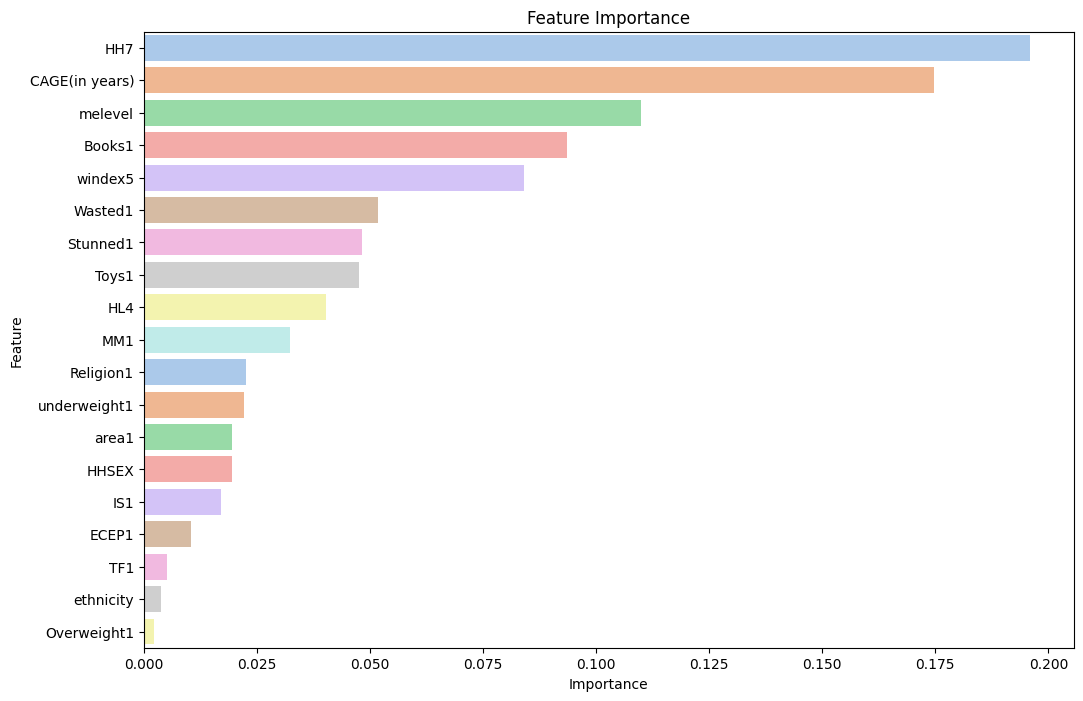

In [ ]:
# CART

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline



pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

try:
    feature_importances = best_estimator.named_steps['classifier'].feature_importances_
    features = x_train.columns
    importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
    importance_df = importance_df.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
except AttributeError:
    print("Feature importances are not available for this model.")



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 333, in fit
    self._final_estimator.fit(Xt, yt, **last_step_params["fit"])
  File "/usr/local/li

Best parameters found:  {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Cross-validation scores: [0.98137652 0.97651822 0.96680162 0.97246964 0.97568882]
Mean cross-validation accuracy: 0.9745709617517175
Training accuracy: 0.9881762228701004
Testing accuracy: 0.9740932642487047
Training Confusion Matrix:
 [[  45   36]
 [  37 6056]]
Testing Confusion Matrix:
 [[   1   18]
 [  22 1503]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.55        81
           1       0.99      0.99      0.99      6093

    accuracy                           0.99      6174
   macro avg       0.77      0.77      0.77      6174
weighted avg       0.99      0.99      0.99      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.05      0

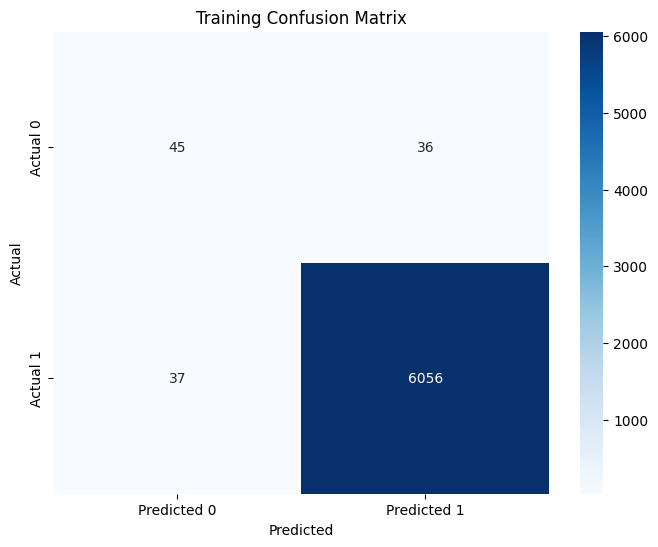

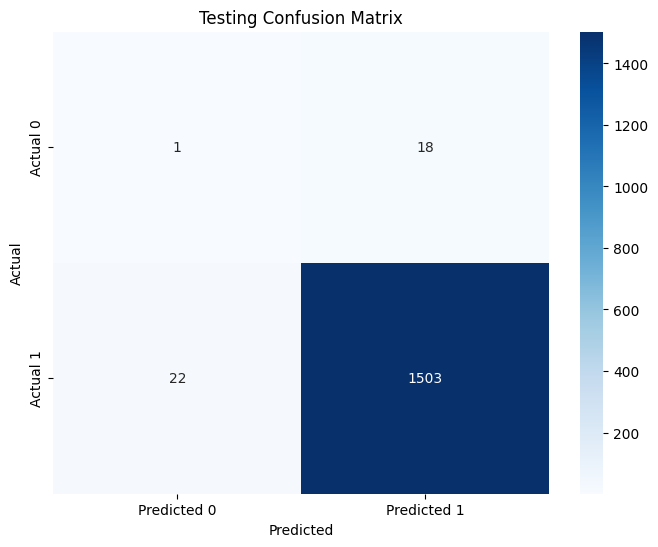

<ipython-input-43-9e5224888a4e>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


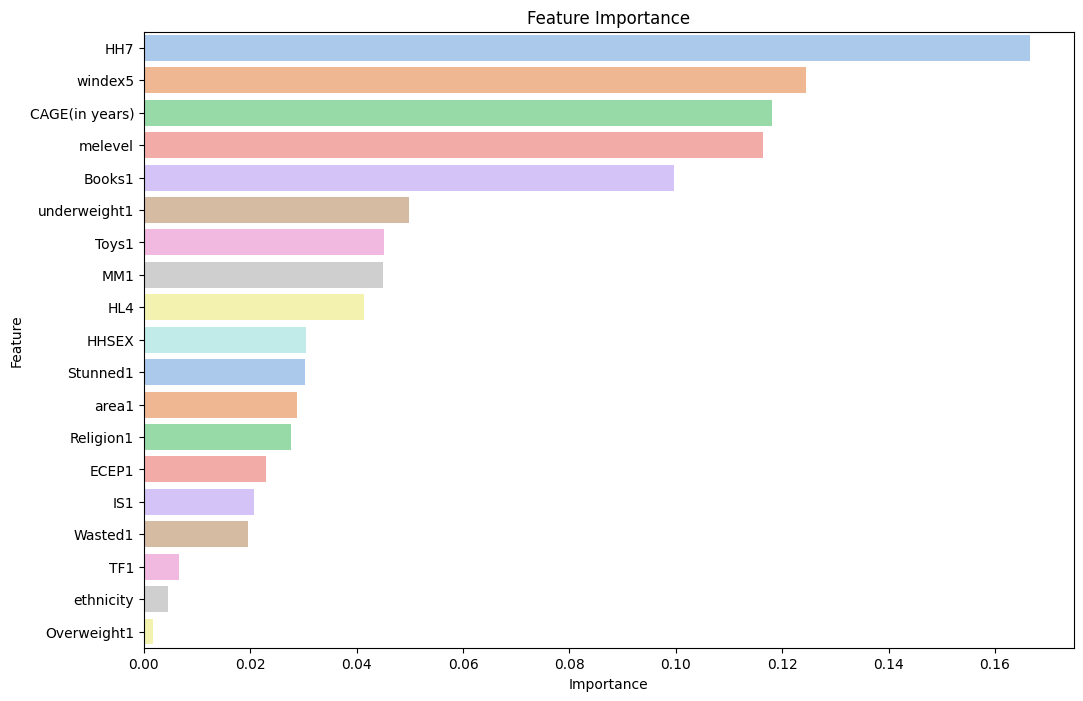

In [ ]:
# Random Forest

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score


pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)


train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 9, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores: [0.97327935 0.97004049 0.95303644 0.9611336  0.96677472]
Mean cross-validation accuracy: 0.964852918982408


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training accuracy: 0.9907677356656949
Testing accuracy: 0.9676165803108808
Training Confusion Matrix:
 [[  65   16]
 [  41 6052]]
Testing Confusion Matrix:
 [[   1   18]
 [  32 1493]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.70        81
           1       1.00      0.99      1.00      6093

    accuracy                           0.99      6174
   macro avg       0.81      0.90      0.85      6174
weighted avg       0.99      0.99      0.99      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.05      0.04        19
           1       0.99      0.98      0.98      1525

    accuracy                           0.97      1544
   macro avg       0.51      0.52      0.51      1544
weighted avg       0.98      0.97      0.97      1544

Training Cohen's Kappa: 0.6905850887049552
Testing Cohen's Kappa: 0.02320520282410099
Training RO

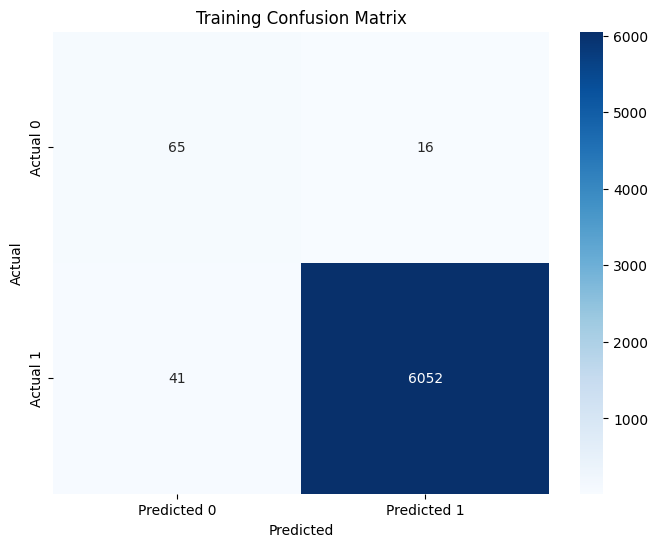

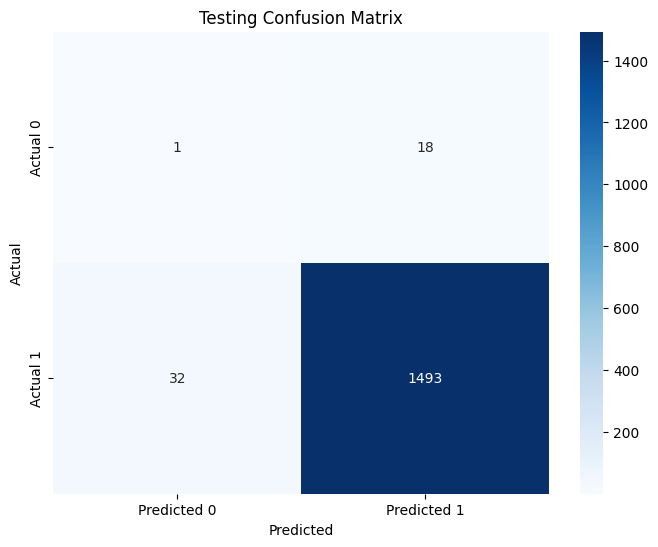

<ipython-input-44-a549342a3191>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


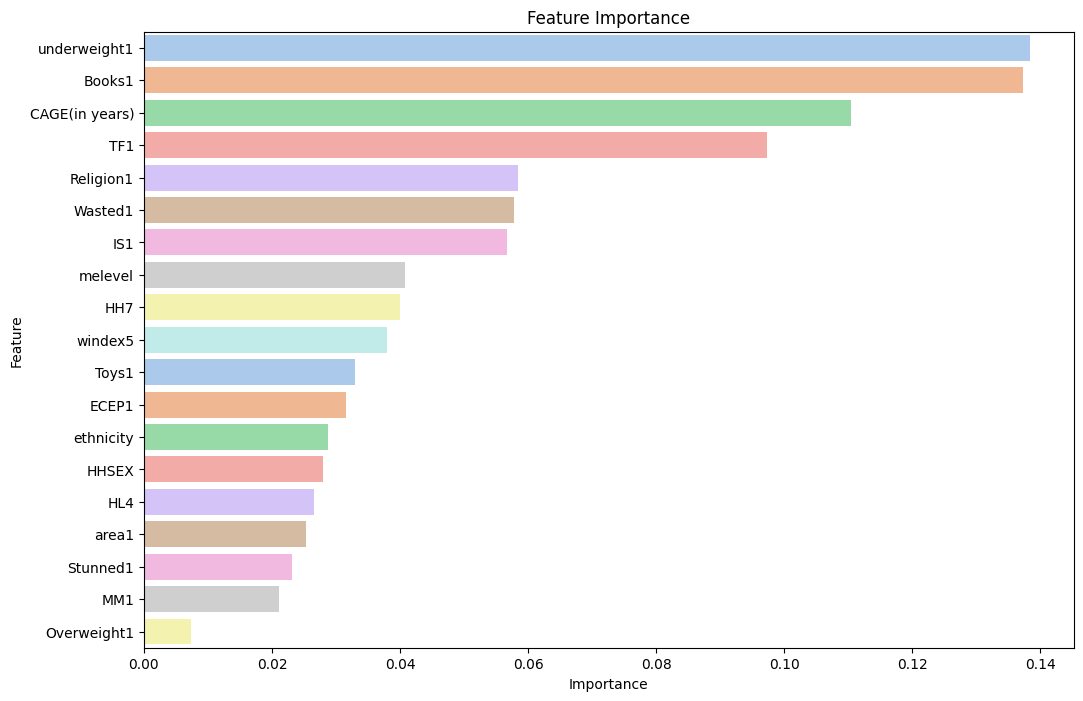

In [ ]:
# XGBoost

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score


pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 6, 9],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)


train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'classifier__C': 1, 'classifier__l1_ratio': 0.5, 'classifier__penalty': 'elasticnet'}
Cross-validation scores: [0.78704453 0.77651822 0.79595142 0.79595142 0.77795786]
Mean cross-validation accuracy: 0.7866846895320836
Training accuracy: 0.7798833819241983
Testing accuracy: 0.7843264248704663
Training Confusion Matrix:
 [[  37   44]
 [1315 4778]]
Testing Confusion Matrix:
 [[   3   16]
 [ 317 1208]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.46      0.05        81
           1       0.99      0.78      0.88      6093

    accuracy                           0.78      6174
   macro avg       0.51      0.62      0.46      6174
weighted avg       0.98      0.78      0.86      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.16      0.02        19
        

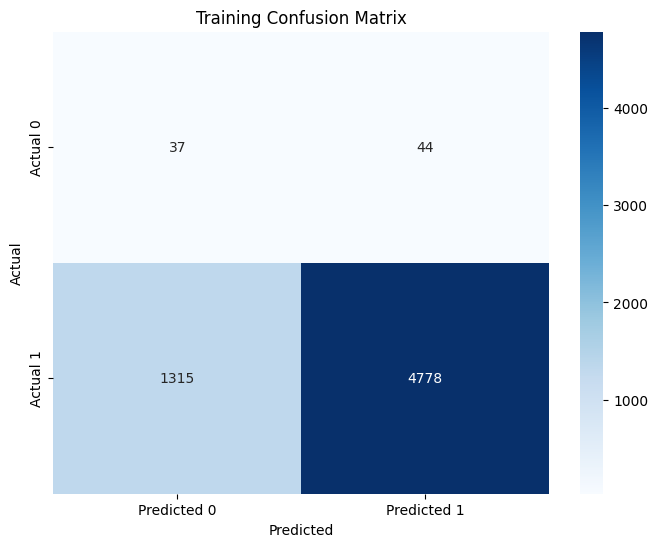

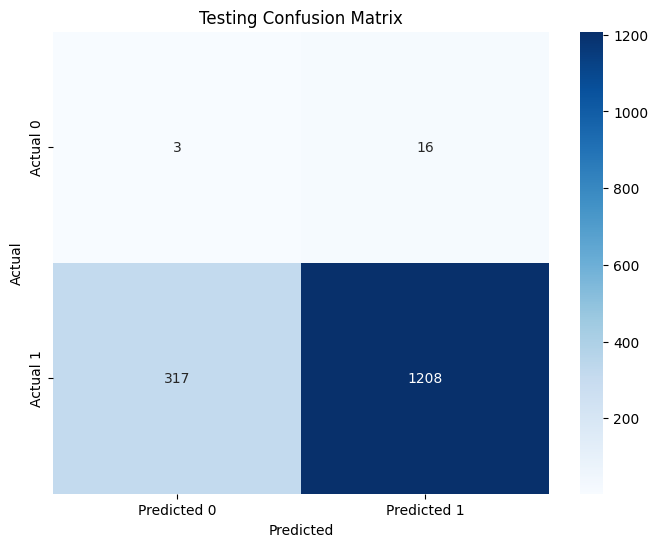

<ipython-input-45-f00afc465f92>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


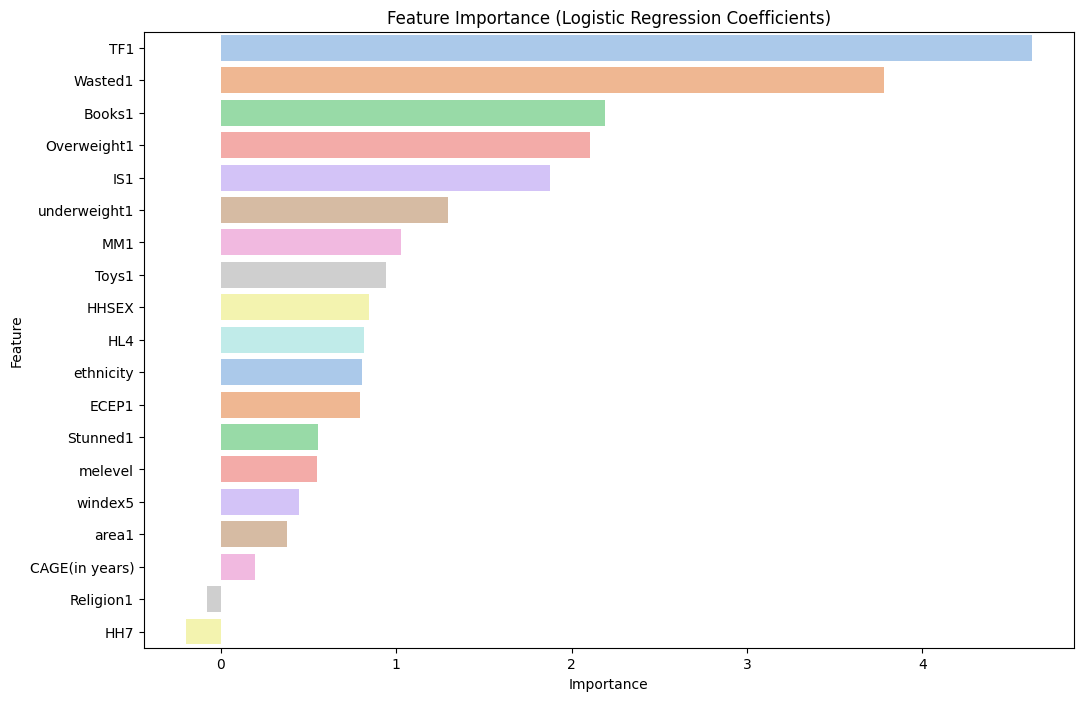

In [ ]:
# Logistic Regression

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score


pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='saga', random_state=42, max_iter=5000))
])

param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].coef_[0]
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Training accuracy: 0.8146233382570163
Testing accuracy: 0.7778497409326425
Training Confusion Matrix:
 [[5141  952]
 [1307 4786]]
Testing Confusion Matrix:
 [[   4   15]
 [ 328 1197]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      6093
           1       0.83      0.79      0.81      6093

    accuracy                           0.81     12186
   macro avg       0.82      0.81      0.81     12186
weighted avg       0.82      0.81      0.81     12186

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.21      0.02        19
           1       0.99      0.78      0.87      1525

    accuracy                           0.78      1544
   macro avg       0.50      0.50      0.45      1544
weighted avg       0.98      0.78      0.86      1544

Training Cohen's Kappa: 0.6292466765140325
Testing Cohen's Kappa: -0.0004987455793006301
Training

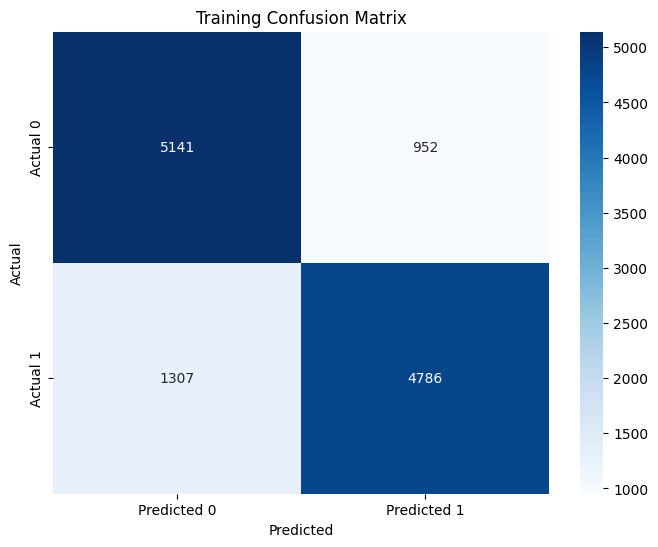

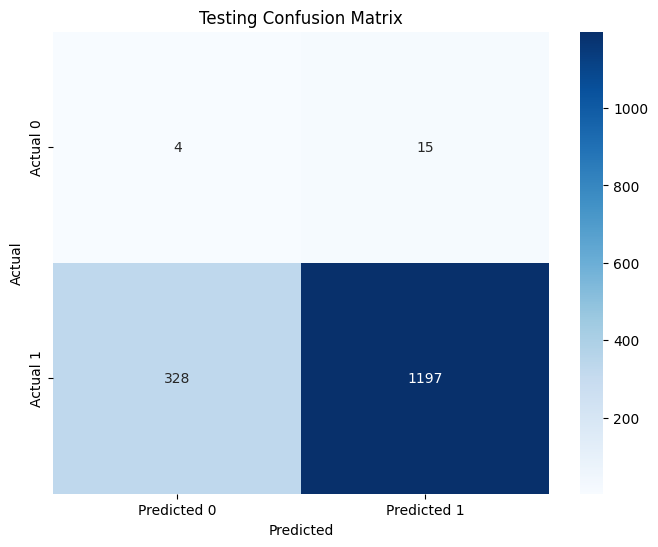

<ipython-input-46-f93ac0921f24>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


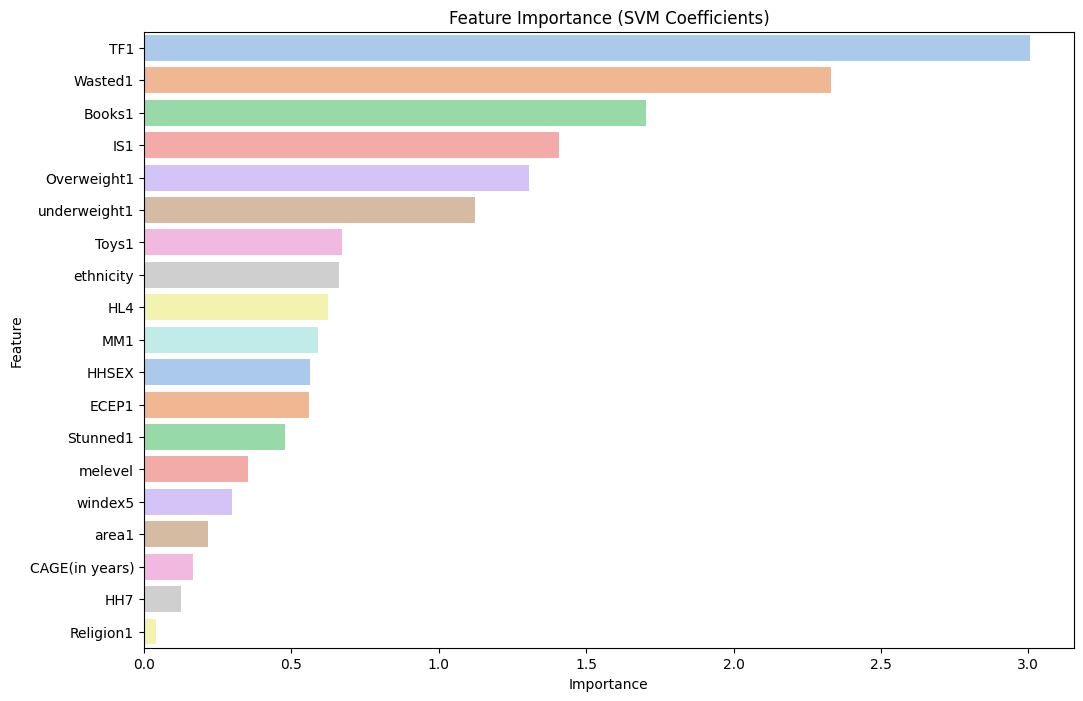

In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

svm = SVC(probability=True, kernel='linear')

svm.fit(x_train_resampled, y_train_resampled)

y_train_pred = svm.predict(x_train_resampled)
y_test_pred = svm.predict(x_test)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train_resampled, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train_resampled, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train_resampled, svm.predict_proba(x_train_resampled)[:, 1])
test_roc_auc = roc_auc_score(y_test, svm.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = np.abs(svm.coef_[0])
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (SVM Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Learning

In [ ]:
learning = mics_final.drop(['Literacy_numeracy_score1','Physical_score1','Social_emotional_score1'],axis=1)

In [ ]:
x = learning.drop('Learning_score1',axis=1)
y = learning['Learning_score1']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Cross-validation scores: [0.77327935 0.78461538 0.79433198 0.7854251  0.77309562]
Mean cross-validation accuracy: 0.7821494891698765
Training accuracy: 0.953514739229025
Testing accuracy: 0.7603626943005182
Training Confusion Matrix:
 [[ 555   17]
 [ 270 5332]]
Testing Confusion Matrix:
 [[  46  109]
 [ 261 1128]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.97      0.79       572
           1       1.00      0.95      0.97      5602

    accuracy                           0.95      6174
   macro avg       0.83      0.96      0.88      6174
weighted avg       0.97      0.95      0.96      6174

Testing Classification Report:
               precision    re

<ipython-input-50-47cf59a85213>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


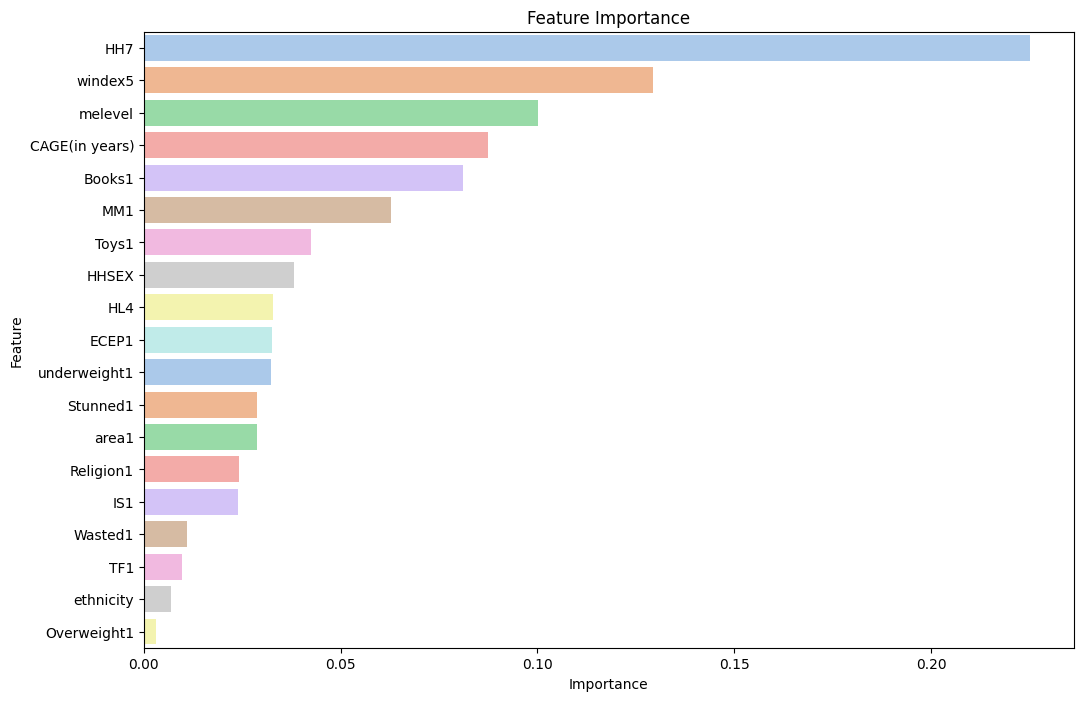

In [ ]:
# CART

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline



pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

try:
    feature_importances = best_estimator.named_steps['classifier'].feature_importances_
    features = x_train.columns
    importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
    importance_df = importance_df.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
except AttributeError:
    print("Feature importances are not available for this model.")



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
470 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Best parameters found:  {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Cross-validation scores: [0.85263158 0.83562753 0.84939271 0.83562753 0.83468395]
Mean cross-validation accuracy: 0.8415926613691692
Training accuracy: 0.9433106575963719
Testing accuracy: 0.8218911917098446
Training Confusion Matrix:
 [[ 450  122]
 [ 228 5374]]
Testing Confusion Matrix:
 [[  30  125]
 [ 150 1239]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       572
           1       0.98      0.96      0.97      5602

    accuracy                           0.94      6174
   macro avg       0.82      0.87      0.84      6174
weighted avg       0.95      0.94      0.95      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.19      0

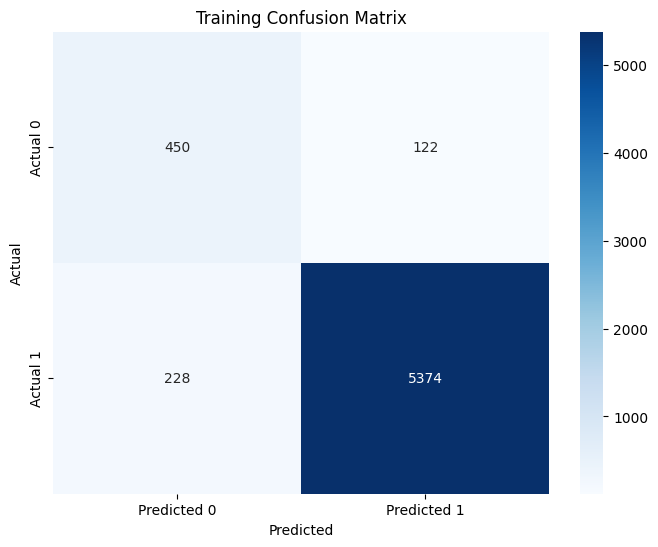

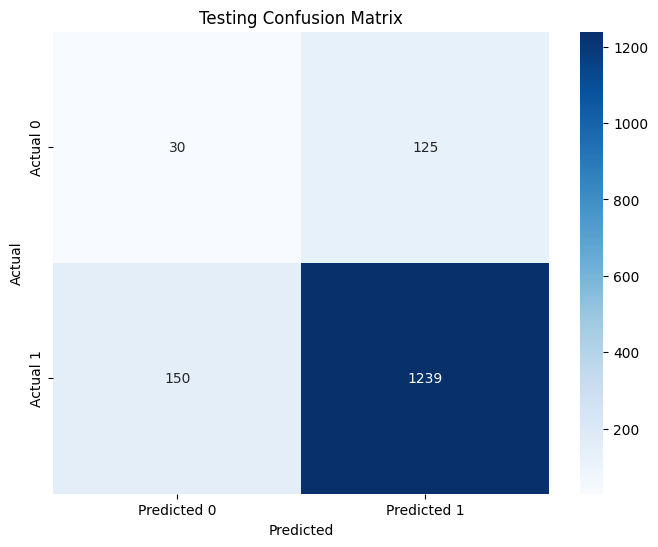

<ipython-input-52-9e5224888a4e>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


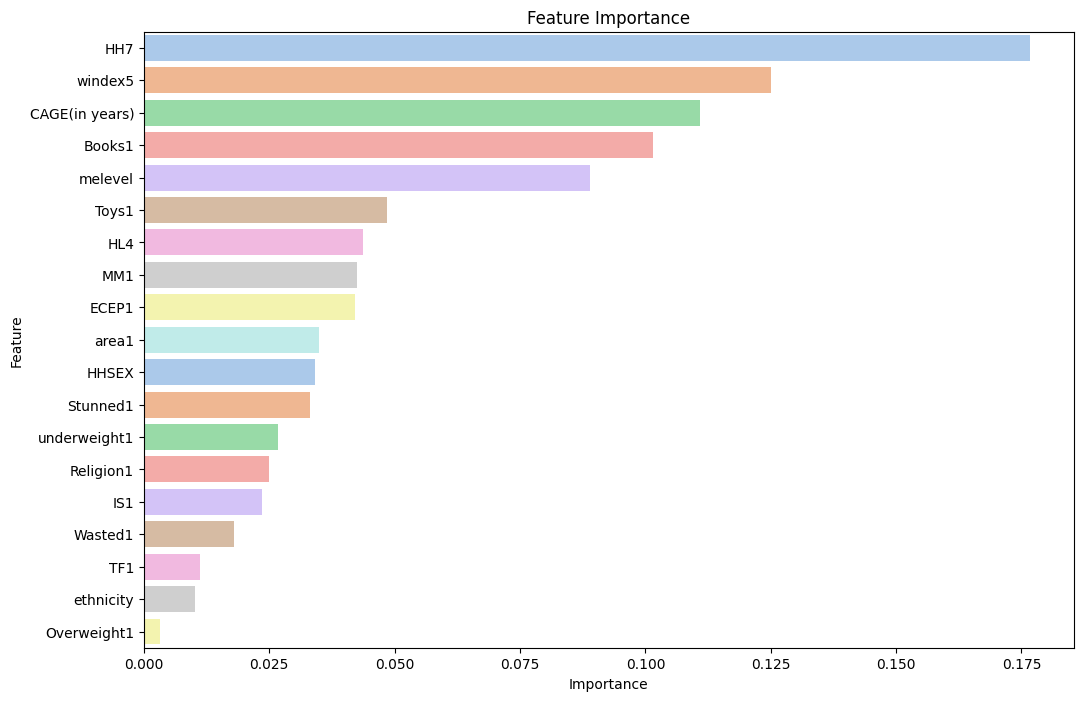

In [ ]:
# Random Forest

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score


pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)


train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 9, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores: [0.82834008 0.8194332  0.83562753 0.82267206 0.82252836]
Mean cross-validation accuracy: 0.8257202475081857


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training accuracy: 0.9379656624554584
Testing accuracy: 0.8102331606217616
Training Confusion Matrix:
 [[ 493   79]
 [ 304 5298]]
Testing Confusion Matrix:
 [[  31  124]
 [ 169 1220]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.86      0.72       572
           1       0.99      0.95      0.97      5602

    accuracy                           0.94      6174
   macro avg       0.80      0.90      0.84      6174
weighted avg       0.95      0.94      0.94      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.20      0.17       155
           1       0.91      0.88      0.89      1389

    accuracy                           0.81      1544
   macro avg       0.53      0.54      0.53      1544
weighted avg       0.83      0.81      0.82      1544

Training Cohen's Kappa: 0.6864052194315502
Testing Cohen's Kappa: 0.06938204558545213
Training RO

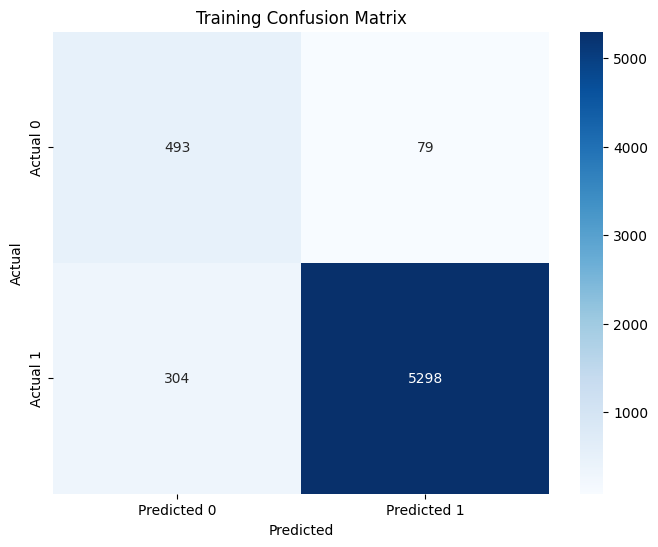

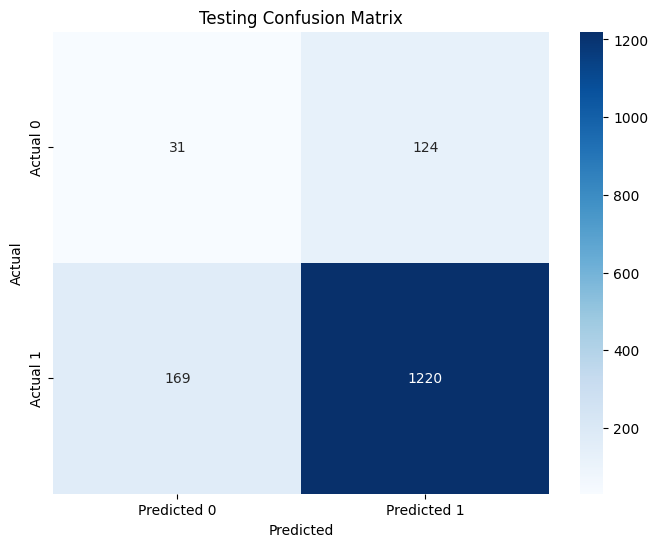

<ipython-input-54-a549342a3191>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


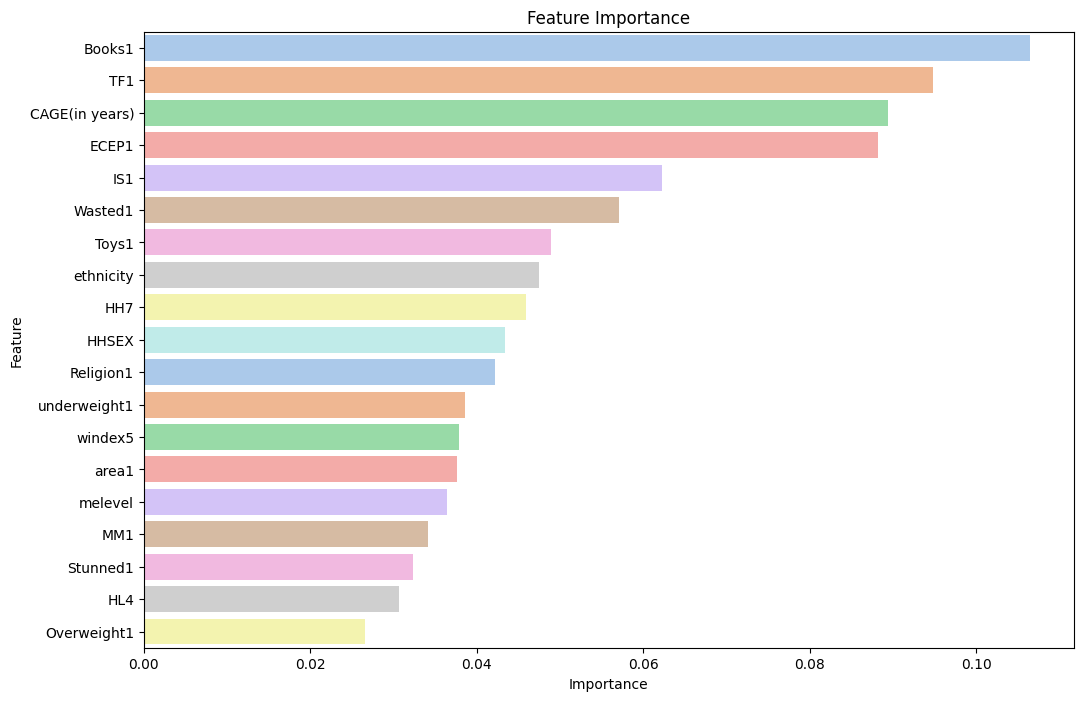

In [ ]:
# XGBoost

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score


pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 6, 9],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)


train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.


Best parameters found:  {'classifier__C': 0.01, 'classifier__l1_ratio': 0, 'classifier__penalty': 'none'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.


Cross-validation scores: [0.66153846 0.65182186 0.66153846 0.64210526 0.65153971]
Mean cross-validation accuracy: 0.6537087513697596
Training accuracy: 0.6551668286362163
Testing accuracy: 0.6528497409326425
Training Confusion Matrix:
 [[ 267  305]
 [1824 3778]]
Testing Confusion Matrix:
 [[ 76  79]
 [457 932]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Training Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.47      0.20       572
           1       0.93      0.67      0.78      5602

    accuracy                           0.66      6174
   macro avg       0.53      0.57      0.49      6174
weighted avg       0.85      0.66      0.73      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.49      0.22       155
           1       0.92      0.67      0.78      1389

    accuracy                           0.65      1544
   macro avg       0.53      0.58      0.50      1544
weighted avg       0.84      0.65      0.72      1544

Training Cohen's Kappa: 0.06440283180791473
Testing Cohen's Kappa: 0.07743004229456363
Training ROC-AUC Score: 0.5969560384278342
Testing ROC-AUC Score: 0.6019159757541978


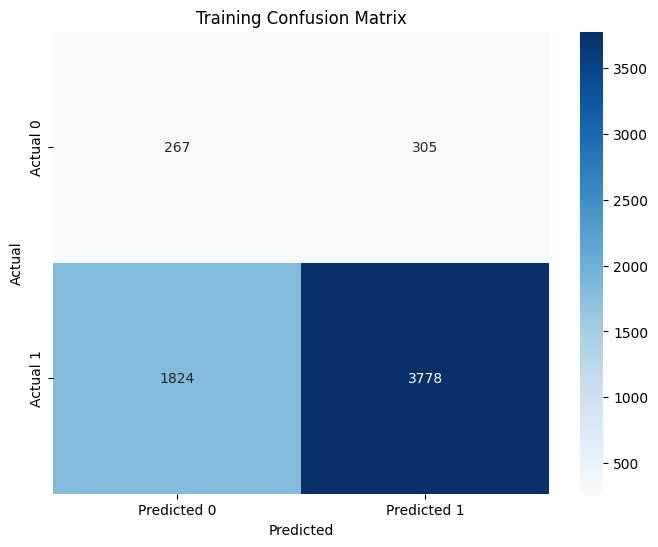

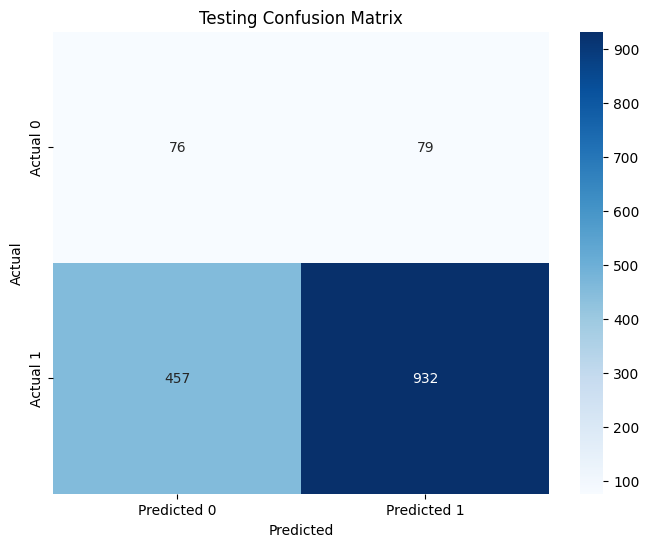

<ipython-input-55-0e6e23353c3a>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


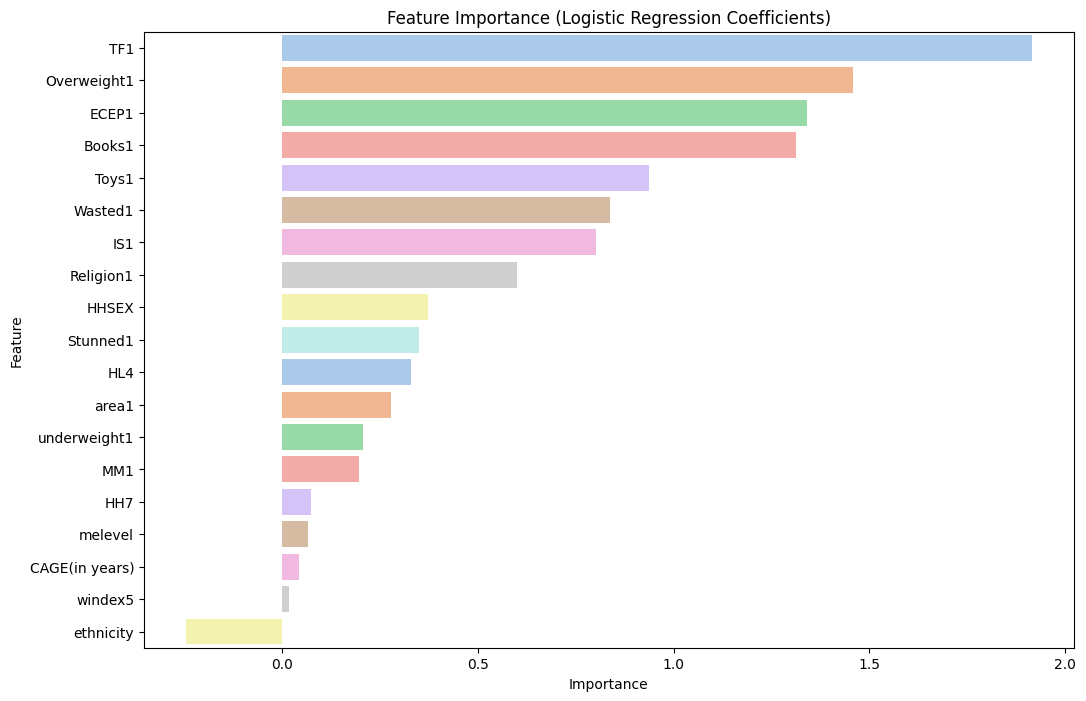

In [ ]:
# Logistic Regression

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd


pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='saga', random_state=42, max_iter=5000))
])

param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].coef_[0]
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Training accuracy: 0.6991253123884327
Testing accuracy: 0.6483160621761658
Training Confusion Matrix:
 [[4140 1462]
 [1909 3693]]
Testing Confusion Matrix:
 [[ 82  73]
 [470 919]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      5602
           1       0.72      0.66      0.69      5602

    accuracy                           0.70     11204
   macro avg       0.70      0.70      0.70     11204
weighted avg       0.70      0.70      0.70     11204

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.53      0.23       155
           1       0.93      0.66      0.77      1389

    accuracy                           0.65      1544
   macro avg       0.54      0.60      0.50      1544
weighted avg       0.85      0.65      0.72      1544

Training Cohen's Kappa: 0.39825062477686546
Testing Cohen's Kappa: 0.0891874744700637
Training ROC-AU

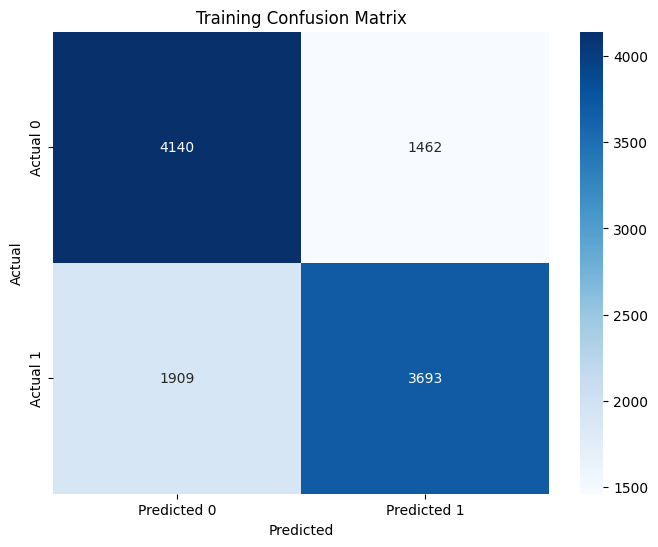

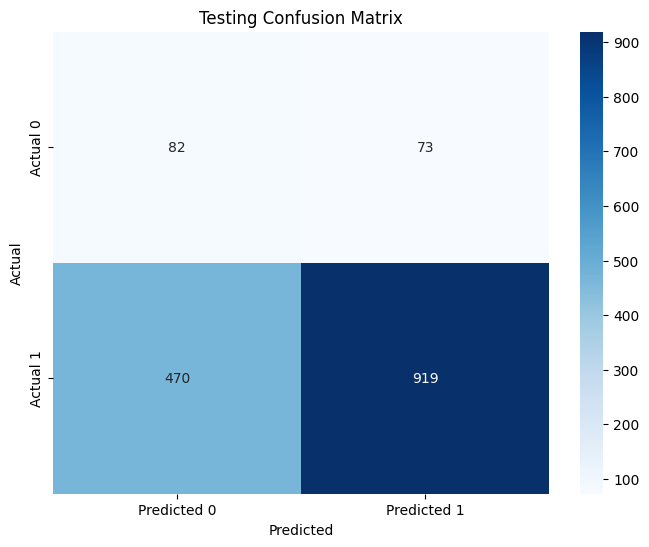

<ipython-input-56-f93ac0921f24>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


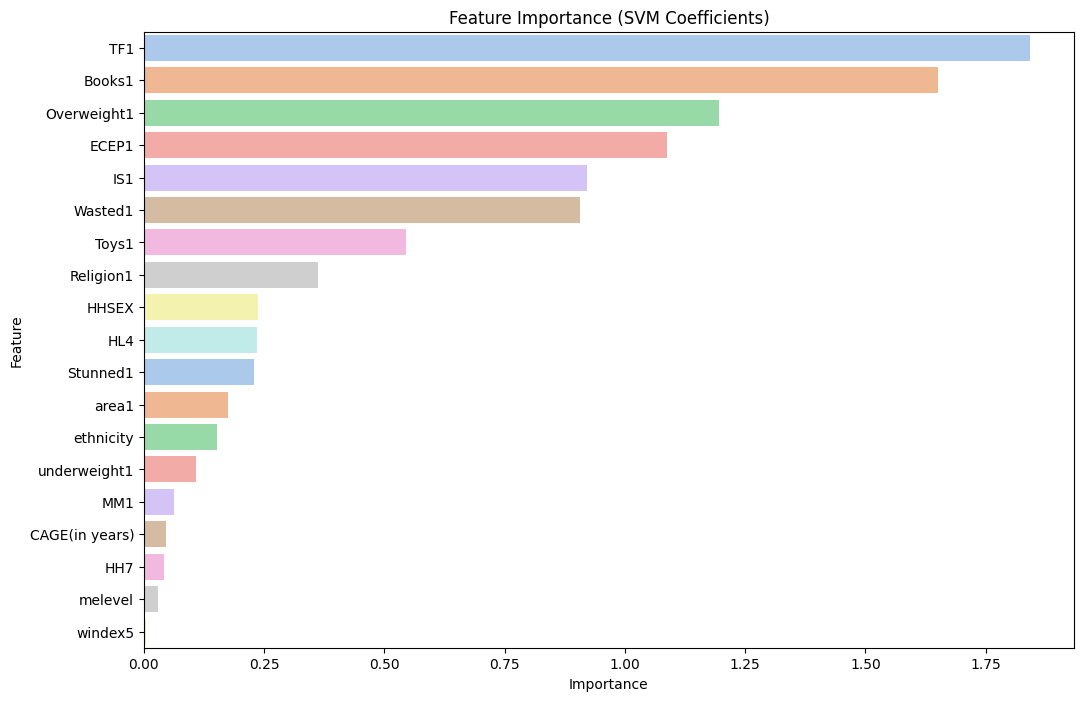

In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

svm = SVC(probability=True, kernel='linear')

svm.fit(x_train_resampled, y_train_resampled)

y_train_pred = svm.predict(x_train_resampled)
y_test_pred = svm.predict(x_test)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train_resampled, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train_resampled, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train_resampled, svm.predict_proba(x_train_resampled)[:, 1])
test_roc_auc = roc_auc_score(y_test, svm.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = np.abs(svm.coef_[0])
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (SVM Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Social-Emotional

In [ ]:
social_emotional = mics_final.drop(['Literacy_numeracy_score1','Physical_score1','Learning_score1'],axis=1)

In [ ]:
x = social_emotional.drop('Social_emotional_score1',axis=1)
y = social_emotional['Social_emotional_score1']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Cross-validation scores: [0.56032389 0.56761134 0.58299595 0.58137652 0.60696921]
Mean cross-validation accuracy: 0.5798553796284752
Training accuracy: 0.9293812763200519
Testing accuracy: 0.5874352331606217
Training Confusion Matrix:
 [[1663   33]
 [ 403 4075]]
Testing Confusion Matrix:
 [[188 244]
 [393 719]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1696
           1       0.99      0.91      0.95      4478

    accuracy                           0.93      6174
   macro avg       0.90      0.95      0.92      6174
weighted avg       0.94      0.93      0.93      6174

Testing Classification Report:
               precision    recall  

<ipython-input-85-47cf59a85213>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


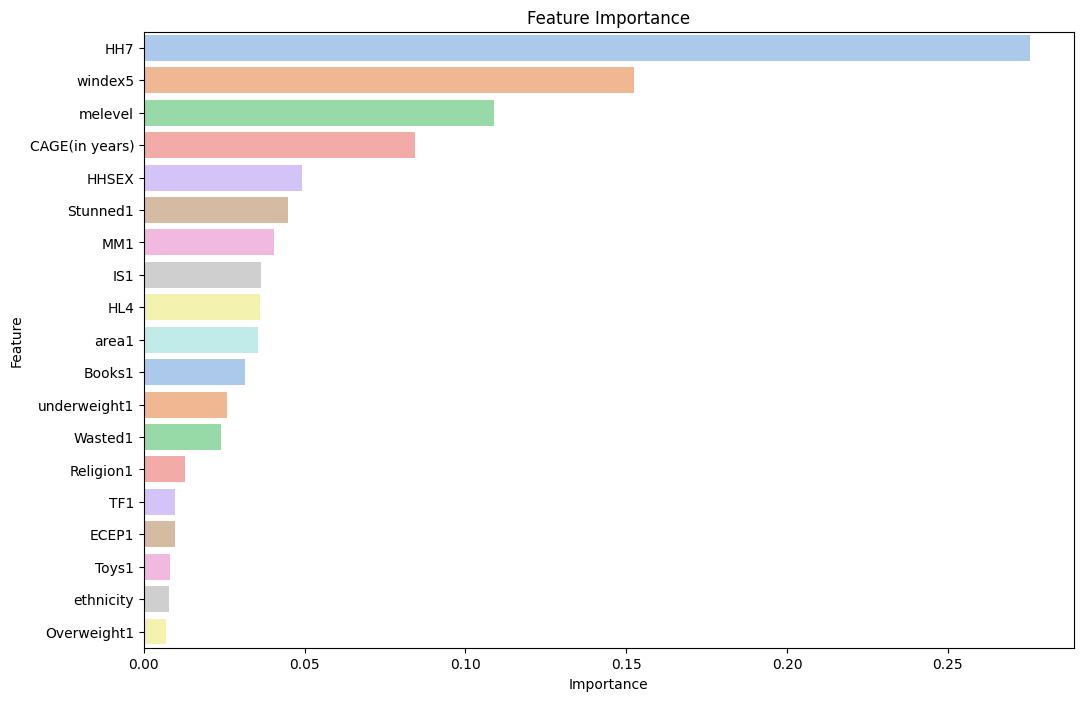

In [ ]:
# CART

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline



pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

try:
    feature_importances = best_estimator.named_steps['classifier'].feature_importances_
    features = x_train.columns
    importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
    importance_df = importance_df.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
except AttributeError:
    print("Feature importances are not available for this model.")



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
496 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Best parameters found:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 300}
Cross-validation scores: [0.67287449 0.65263158 0.65182186 0.64129555 0.6636953 ]
Mean cross-validation accuracy: 0.6564637563238603
Training accuracy: 0.906057661159702
Testing accuracy: 0.6405440414507773
Training Confusion Matrix:
 [[1485  211]
 [ 369 4109]]
Testing Confusion Matrix:
 [[135 297]
 [258 854]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      1696
           1       0.95      0.92      0.93      4478

    accuracy                           0.91      6174
   macro avg       0.88      0.90      0.89      6174
weighted avg       0.91      0.91      0.91      6174

Testing Classification Report:
               precision    recall  f1-scor

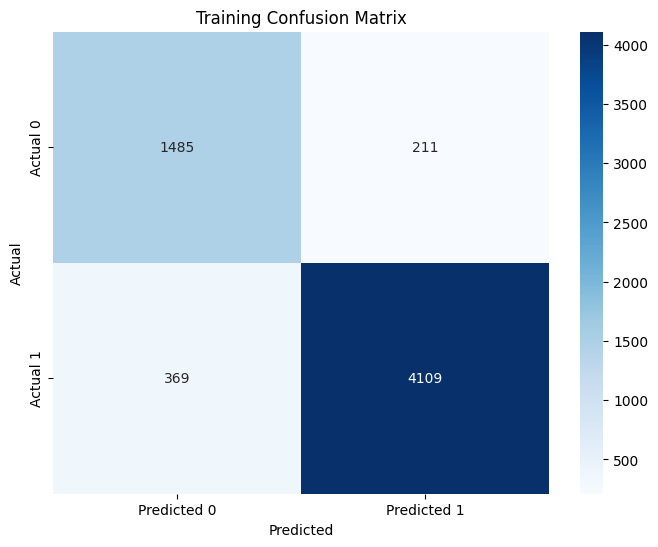

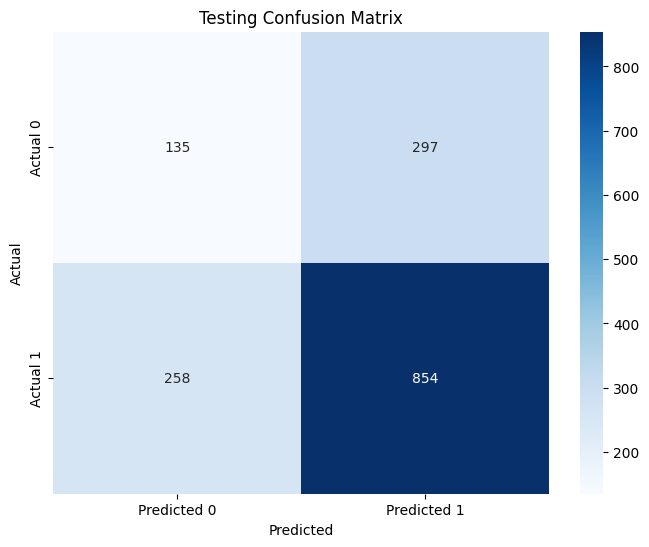

<ipython-input-61-996d2ba857f5>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


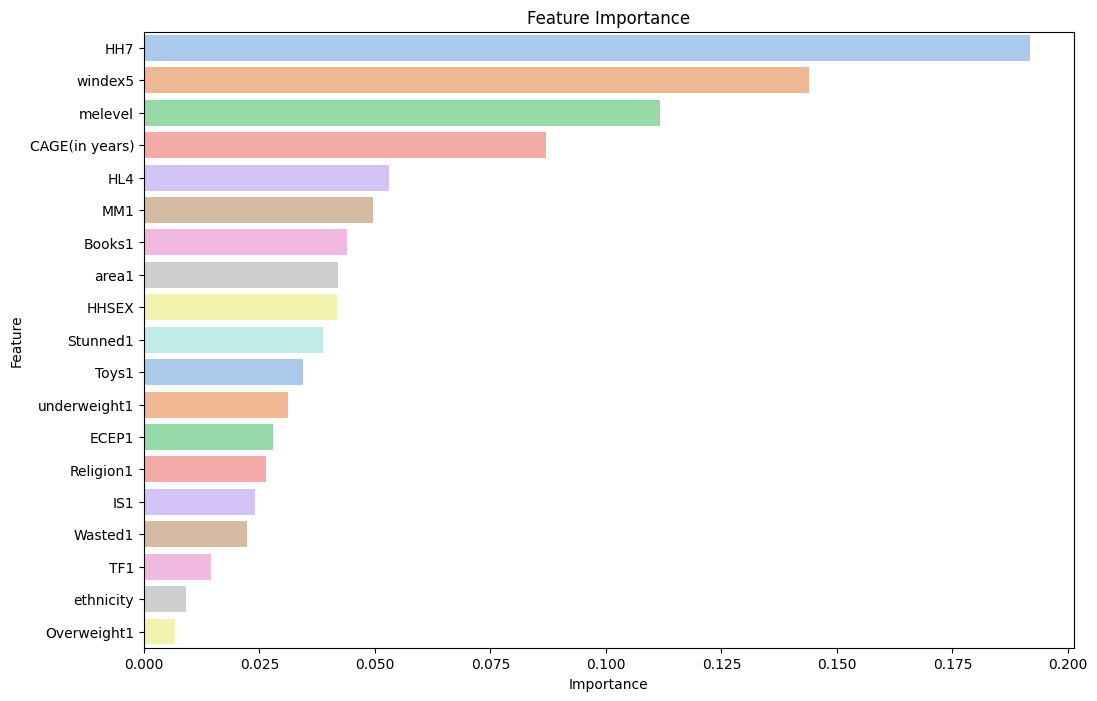

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE


pipeline = make_pipeline(
    SMOTE(random_state=42),
    RandomForestClassifier(random_state=42)
)

param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['randomforestclassifier'].feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 9, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores: [0.6388664  0.65425101 0.63724696 0.62348178 0.6458671 ]
Mean cross-validation accuracy: 0.6399426505423264


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training accuracy: 0.8846776805960479
Testing accuracy: 0.6191709844559585
Training Confusion Matrix:
 [[1473  223]
 [ 489 3989]]
Testing Confusion Matrix:
 [[153 279]
 [309 803]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81      1696
           1       0.95      0.89      0.92      4478

    accuracy                           0.88      6174
   macro avg       0.85      0.88      0.86      6174
weighted avg       0.89      0.88      0.89      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.35      0.34       432
           1       0.74      0.72      0.73      1112

    accuracy                           0.62      1544
   macro avg       0.54      0.54      0.54      1544
weighted avg       0.63      0.62      0.62      1544

Training Cohen's Kappa: 0.724039115627041
Testing Cohen's Kappa: 0.07470280318966782
Training ROC-AUC

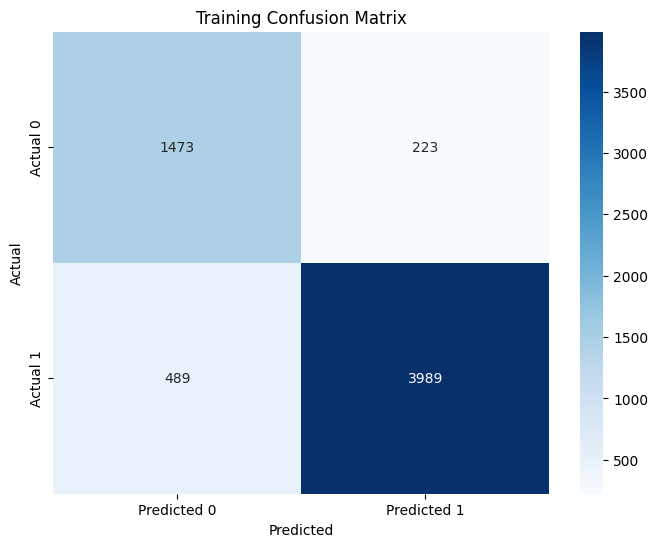

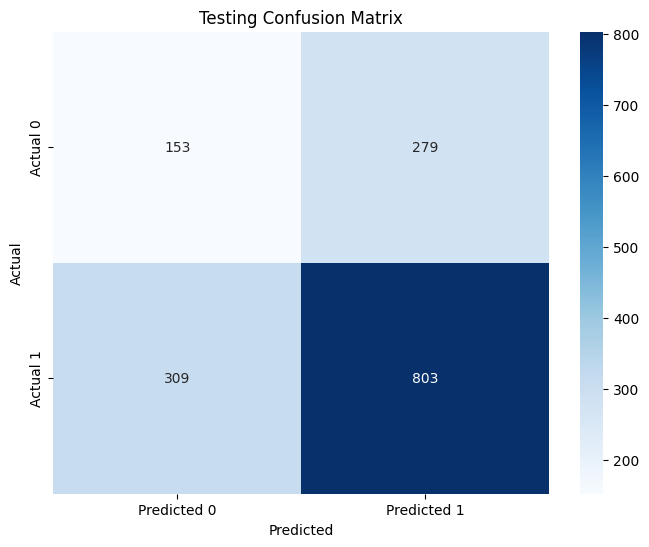

<ipython-input-86-a549342a3191>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


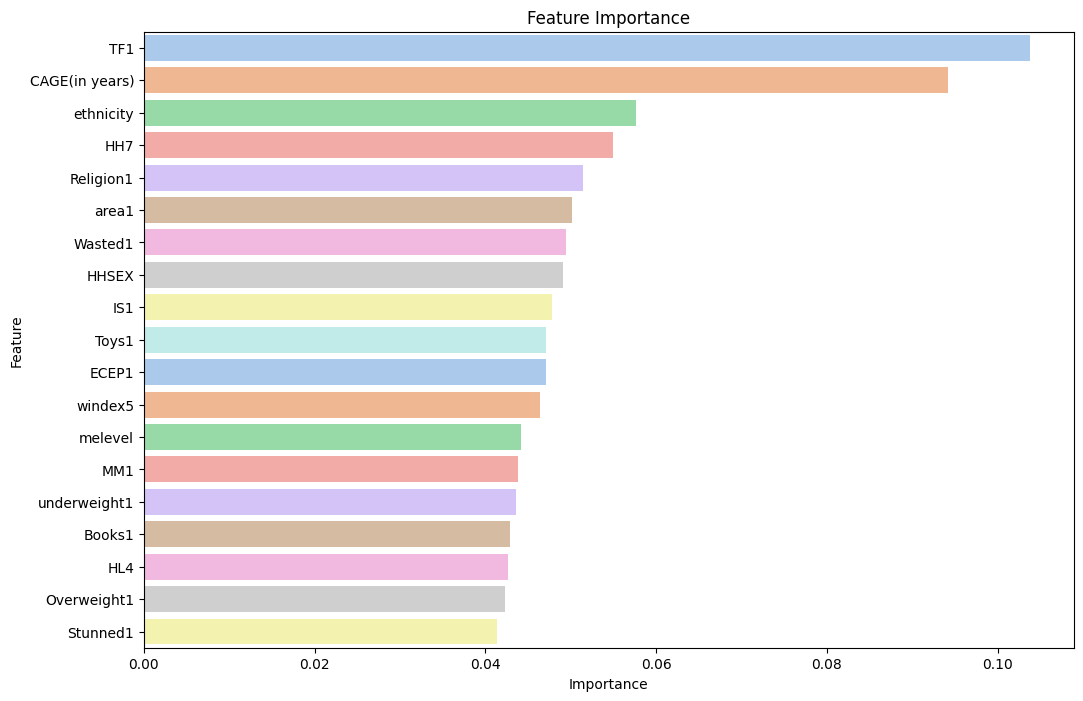

In [ ]:
# XGBoost

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score


pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 6, 9],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)


train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best parameters found:  {'classifier__C': 0.01, 'classifier__l1_ratio': 0, 'classifier__penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Cross-validation scores: [0.55303644 0.53846154 0.53684211 0.51659919 0.54213938]
Mean cross-validation accuracy: 0.5374157310743508
Training accuracy: 0.535795270489148
Testing accuracy: 0.5518134715025906
Training Confusion Matrix:
 [[ 880  816]
 [2050 2428]]
Testing Confusion Matrix:
 [[236 196]
 [496 616]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.52      0.38      1696
           1       0.75      0.54      0.63      4478

    accuracy                           0.54      6174
   macro avg       0.52      0.53      0.50      6174
weighted avg       0.63      0.54      0.56      6174

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.55      0.41       432
           1       0.76      0.55      0.64      1112

    accuracy                           0.55      1544
   macro avg       0.54      0.55      0.52      1544
weighted avg       0.64 

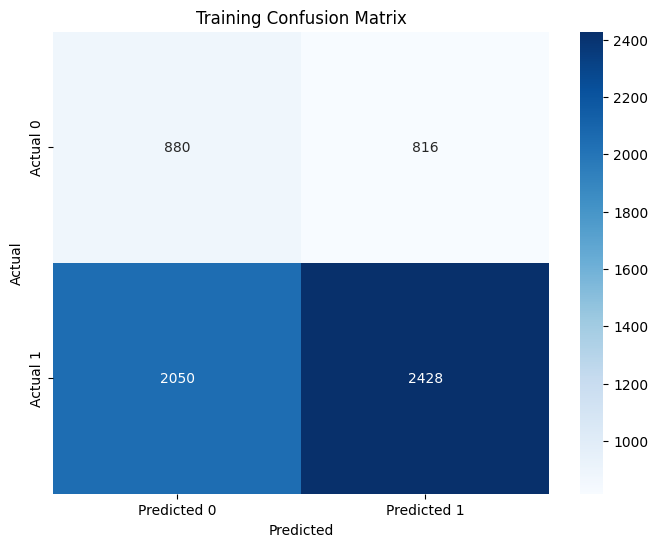

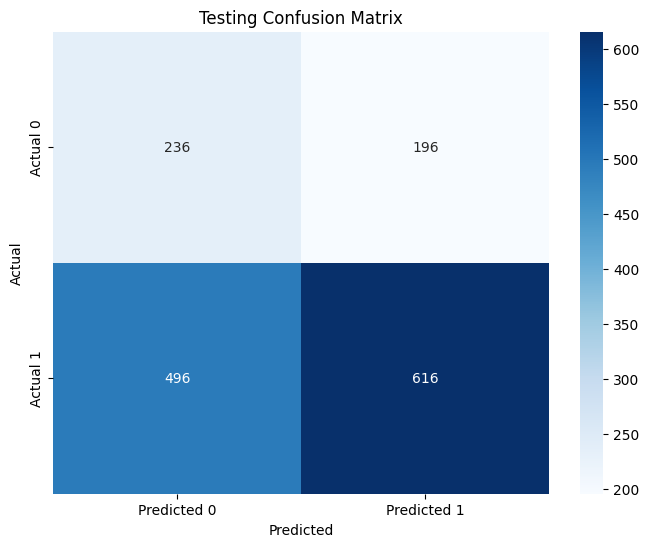

<ipython-input-87-0e6e23353c3a>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


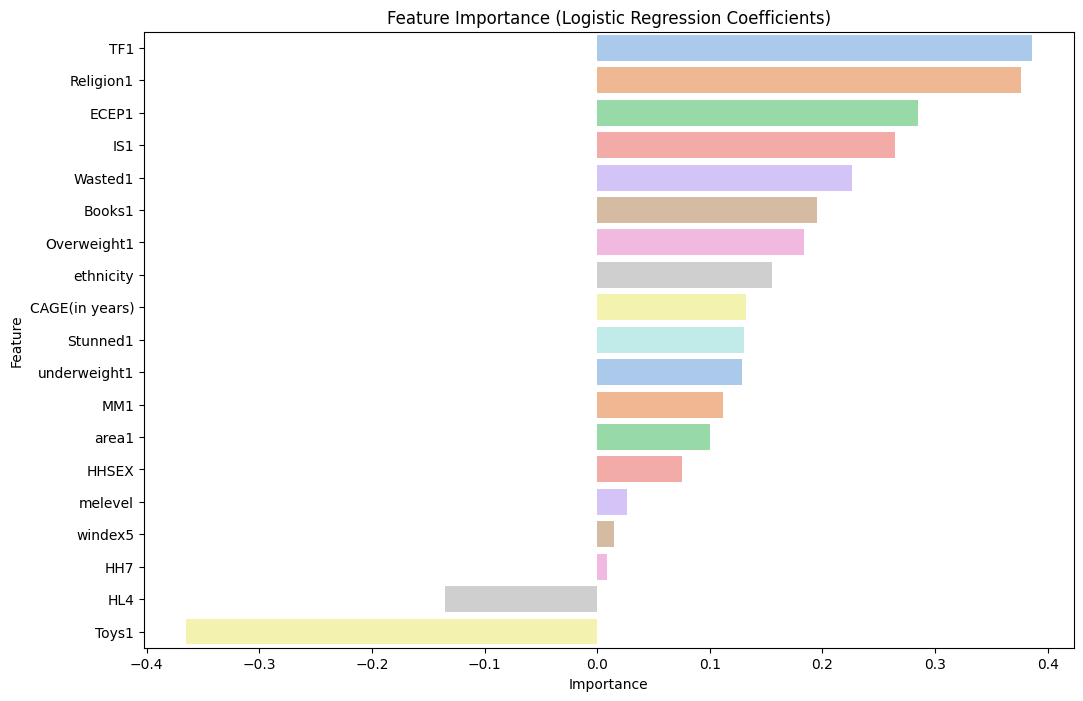

In [ ]:
# Logistic Regression

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd


pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='saga', random_state=42, max_iter=5000))
])

param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters found: ", best_params)

cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", mean_cv_score)

best_estimator.fit(x_train, y_train)
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train, best_estimator.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_estimator.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = best_estimator.named_steps['classifier'].coef_[0]
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Training accuracy: 0.5840777132648504
Testing accuracy: 0.5025906735751295
Training Confusion Matrix:
 [[3260 1218]
 [2507 1971]]
Testing Confusion Matrix:
 [[276 156]
 [612 500]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.73      0.64      4478
           1       0.62      0.44      0.51      4478

    accuracy                           0.58      8956
   macro avg       0.59      0.58      0.58      8956
weighted avg       0.59      0.58      0.58      8956

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.64      0.42       432
           1       0.76      0.45      0.57      1112

    accuracy                           0.50      1544
   macro avg       0.54      0.54      0.49      1544
weighted avg       0.64      0.50      0.52      1544

Training Cohen's Kappa: 0.16815542652970072
Testing Cohen's Kappa: 0.06692853905423768
Training ROC-A

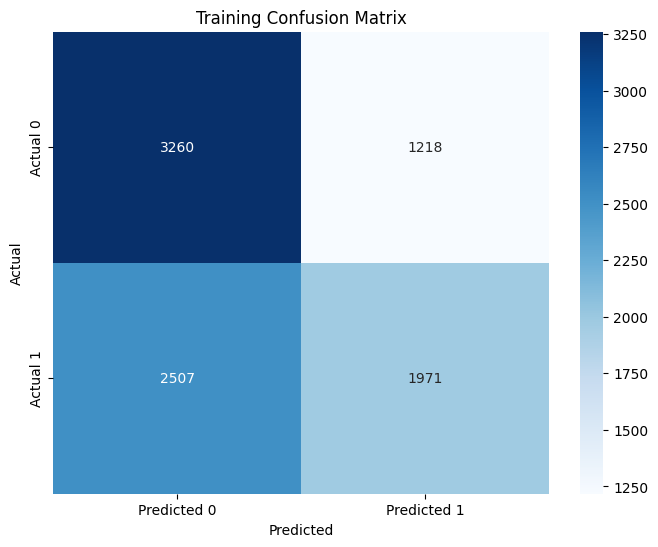

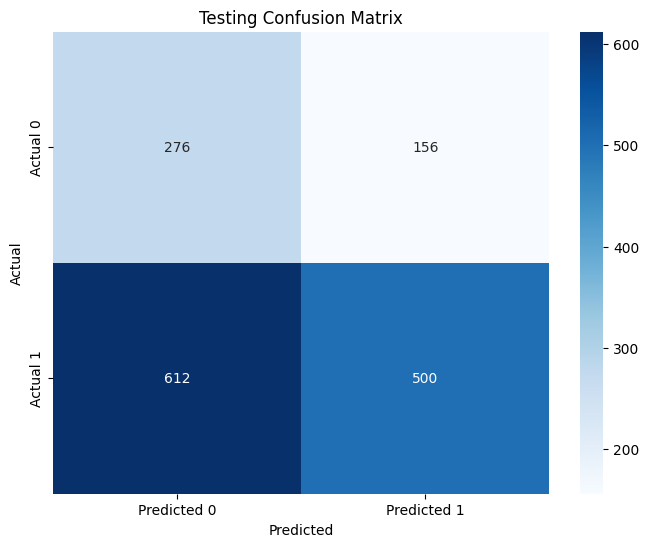

<ipython-input-88-f93ac0921f24>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')


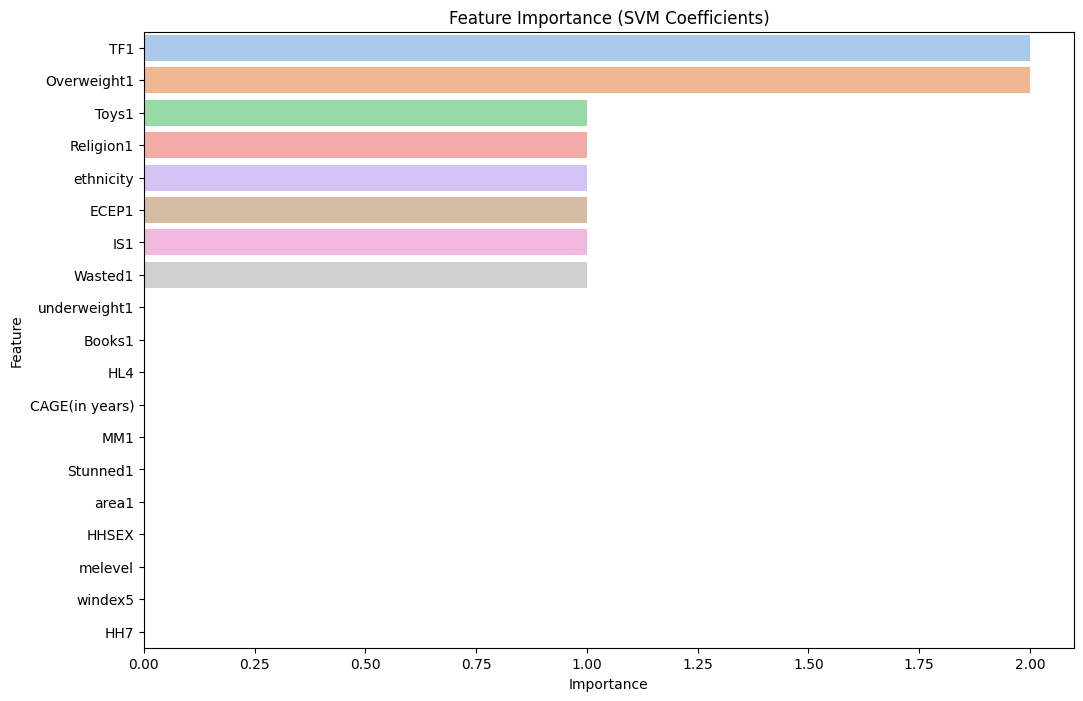

In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

svm = SVC(probability=True, kernel='linear')

svm.fit(x_train_resampled, y_train_resampled)

y_train_pred = svm.predict(x_train_resampled)
y_test_pred = svm.predict(x_test)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

train_conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

train_class_report = classification_report(y_train_resampled, y_train_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Training Classification Report:\n", train_class_report)
print("Testing Classification Report:\n", test_class_report)

train_kappa = cohen_kappa_score(y_train_resampled, y_train_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print("Training Cohen's Kappa:", train_kappa)
print("Testing Cohen's Kappa:", test_kappa)

train_roc_auc = roc_auc_score(y_train_resampled, svm.predict_proba(x_train_resampled)[:, 1])
test_roc_auc = roc_auc_score(y_test, svm.predict_proba(x_test)[:, 1])
print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(train_conf_matrix, "Training Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Testing Confusion Matrix")

feature_importances = np.abs(svm.coef_[0])
features = x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (SVM Coefficients)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
